In [1]:
# %matplotlib notebook
import pandas
import matplotlib.pyplot as plt
from datetime import datetime
from sys import argv
import numpy as np
from numpy import median, mean
from functools import reduce
from collections import Counter

In [2]:
def graph_coverages(results_path, figures_path):
    name = 'Coverages Overlayed'
    contents = pandas.read_csv(results_path + "/metrics.csv")

    pairs = [pair.replace("(", "").replace(")", "").split(',') for pair in contents['percent_coverage']]
    pairs = [(float(pair[0]), float(pair[1])) for pair in pairs]
    primary = [pair[0] for pair in pairs]
    secondary = [pair[1] for pair in pairs]

    datetimes = [datetime.strptime(d, "%Y-%m-%d %H:%M:%S.%f") for d in contents['timestamp']]
    primaries = [(datetimes[i], primary[i]) for i in range(len(datetimes))]
    secondaries = [(datetimes[i], secondary[i]) for i in range(len(datetimes))]

    primaries.sort()
    secondaries.sort()
    
    # Also count the coverages that occurred.
    counts = dict(Counter(pairs))
#     print(counts)
    sorted_counts = [(v, k) for k,v in counts.items()]
#     print(sorted_counts)
    sorted_counts.sort(key=lambda p: p[0])
#     print(sorted_counts[-10:-1])
    
    for f in (min, max): 
        print(f, f(pairs))
    
#     print(median([str(p) for p in pairs]))
    print("Mode double coverage: ", sorted_counts[-1]) 
    
    print(mean(primary))
    print(mean(secondary))
        
    
    # Min Coverage 
    # Max coverage 
    # Median Coverage 
    # Average Coverages 


    print(results_path + name)
    plt.figure(results_path + name)
#     plt.rcParams['figure.figsize'] = [10, 5]
    plt.ylim(-5, 105)
#     plt.plot([pair[0] for pair in secondaries], [pair[1] for pair in secondaries], 'rx')
#     plt.plot([pair[0] for pair in primaries], [pair[1] for pair in primaries], 'bx')
    plt.plot([pair[0] for pair in secondaries], [pair[1] for pair in secondaries], 'r-')
    plt.plot([pair[0] for pair in primaries], [pair[1] for pair in primaries], 'b-')

    plt.savefig(figures_path + name + '.pdf')
    plt.show()
    return {
        "min": min(pairs),
        'max': max(pairs), 
        'mode': sorted_counts[-1],
        'mean_p': mean(primary),
        "mean_s": mean(secondary),
    }

In [3]:
def graph_times(results_path, figures_path):
    name =  "Time from Base to Emergency in Minutes"
    contents = pandas.read_csv(results_path + "/processed_cases.csv")

    # Only the to incident
    times = np.array([[pandas.to_timedelta(td).total_seconds()/60 
                       for td in [contents.values[i][7]]] for i in range(len(contents.values))])


    case_durations = [reduce(lambda a, b: a + b, p, 0.0) for p in times]
    
    within_r1 = [c for c in case_durations if c < 10]
    within_r2 = [c for c in case_durations if c < 14 and c >= 10]
    outside   = [c for c in case_durations if c >= 14]
    
    print("r1: {}, r2: {}, >r2: {}.".format(len(within_r1), len(within_r2), len(outside)))
    
    print(results_path + name)
    plt.figure(results_path +name)

    plt.ylim(-5, 45)
    plt.plot(case_durations, 'ko')
    plt.plot([0, len(case_durations)], [10, 10], 'r-')
    plt.plot([0, len(case_durations)], [14, 14], 'y-')
    plt.savefig(figures_path + name + '.pdf')

    plt.show()
    return {
        "r1": len(within_r1), 
        "r2": len(within_r2), 
        "beyond": len(outside)
           }

In [4]:
def graph_times_priority_1(results_path, figures_path):
    name = "Time from Base to Emergency in Minutes - Priority 1 Only"

    contents = pandas.read_csv(results_path + "/processed_cases.csv")

    times = np.array([[pandas.to_timedelta(td).total_seconds()/60 
                       for td in [contents.values[i][7]]] for i in range(len(contents.values))
                     if contents.values[i][4] == 1])


    case_durations = [reduce(lambda a, b: a + b, p, 0.0) for p in times]
        
    within_r1 = [c for c in case_durations if c < 10]
    within_r2 = [c for c in case_durations if c < 14 and c >= 10]
    outside   = [c for c in case_durations if c >= 14]
    
    print("r1: {}, r2: {}, >r2: {}.".format(len(within_r1), len(within_r2), len(outside)))

    print(results_path + name)
    plt.figure(results_path + name)

    plt.ylim(-5, 45)
    plt.plot(case_durations, 'ko')
    plt.plot([0, len(case_durations)], [10, 10], 'r-')
    plt.plot([0, len(case_durations)], [14, 14], 'y-')
    
    plt.savefig(figures_path + name + '.pdf')
    plt.show()
    return {
        "r1": len(within_r1), 
        "r2": len(within_r2), 
        "beyond": len(outside)
           }

In [5]:
def graph_times_priority_2(results_path, figures_path):
    name = "Time from Base to Emergency in Minutes - Priority 1 and 2 "

    contents = pandas.read_csv(results_path + "/processed_cases.csv")

    times = np.array([[pandas.to_timedelta(td).total_seconds()/60 
                       for td in [contents.values[i][7]]] for i in range(len(contents.values))
                     if contents.values[i][4] == 1 or contents.values[i][4] == 2])

    case_durations = [reduce(lambda a, b: a + b, p, 0.0) for p in times]

    within_r1 = [c for c in case_durations if c < 10]
    within_r2 = [c for c in case_durations if c < 14 and c >= 10]
    outside   = [c for c in case_durations if c >= 14]
    
    print("r1: {}, r2: {}, >r2: {}.".format(len(within_r1), len(within_r2), len(outside)))
    
    print(results_path + name)
    plt.figure(results_path + name)

    plt.ylim(-5, 45)
    plt.plot(case_durations, 'ko')
    plt.plot([0, len(case_durations)], [10, 10], 'r-')
    plt.plot([0, len(case_durations)], [14, 14], 'y-')
    
    plt.savefig(figures_path + name + '.pdf')
    plt.show()
    return {
        "r1": len(within_r1), 
        "r2": len(within_r2), 
        "beyond": len(outside)
           }

In [6]:
def graph_delay(results_path, figures_path):
    name_minutes = 'Total Case Delay in Minutes'
    name_cases = 'Total number of cases being delayed'
    
    contents = pandas.read_csv(results_path + "/metrics.csv")
    
    metrics = []
    for values in contents.values:
        metrics.append((
            datetime.strptime(values[0], "%Y-%m-%d %H:%M:%S.%f"),
            pandas.to_timedelta(values[2]).total_seconds()/60,
            values[3]
        ))
        
    metrics.sort()
    
    time_delayed = [m[1] for m in metrics]
    num_delayed = [m[2] for m in metrics]
    
    total_time = round(sum(time_delayed), 3)
    total_num = round(sum(num_delayed), 3)
    
    max_time = round(max(time_delayed), 3)
    max_num = round(max(num_delayed), 3)
    
    
    print(results_path + name_minutes)
    plt.figure(results_path + name_minutes)

    plt.plot(
        [p[0] for p in metrics],
        [p[1] for p in metrics],
        'r-'
    )
    plt.plot(
        [p[0] for p in metrics],
        [p[1] for p in metrics],
        'rx'
    )
    plt.savefig(figures_path + name_minutes + '.pdf')
    plt.show() # Comment out if using matplotlib notebooks.
    
    print(results_path + name_cases)
    plt.figure(results_path + name_cases)

    plt.plot(
        [p[0] for p in metrics],
        [p[2] for p in metrics],
        'r-'
    )
    plt.plot(
        [p[0] for p in metrics],
        [p[2] for p in metrics],
        'rx'
    )
    plt.savefig(figures_path + name_cases + '.pdf')
    plt.show()
    
    return {
        'totaltime': total_time,
        'totalnum': total_num,
        'maxtime': max_time,
        'maxnum':max_num
    }
    

In [7]:
def graph(results_path, figures_path, intensity, dispatch_policy):

    print('*' * 80)
    plt.rcParams['figure.figsize'] = [15, 10]
    
    stats = [
    graph_times(results_path, figures_path),
    graph_times_priority_1(results_path, figures_path),
    graph_times_priority_2(results_path, figures_path),
    graph_coverages(results_path, figures_path),
    graph_delay(results_path, figures_path),
    ]
    
    for d in stats:
        if d:
            d['intensity'] = intensity
            d['dispatch_policy'] = dispatch_policy
    
    print('*' * 80)
    print('\n' * 5)
    
    return stats


In [8]:
dispatch_policy = ['Best Travel Time', 'Least Coverage Disruption', 'Optimal Dispatch']

********************************************************************************
r1: 145, r2: 64, >r2: 1.
../results/dibene-barely-freq-best-travel-times/Time from Base to Emergency in Minutes


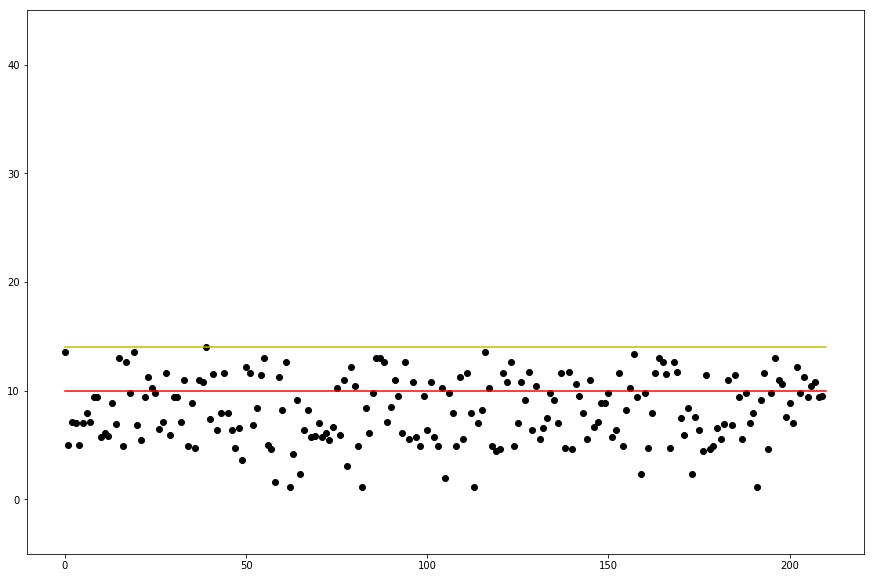

r1: 7, r2: 3, >r2: 0.
../results/dibene-barely-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 Only


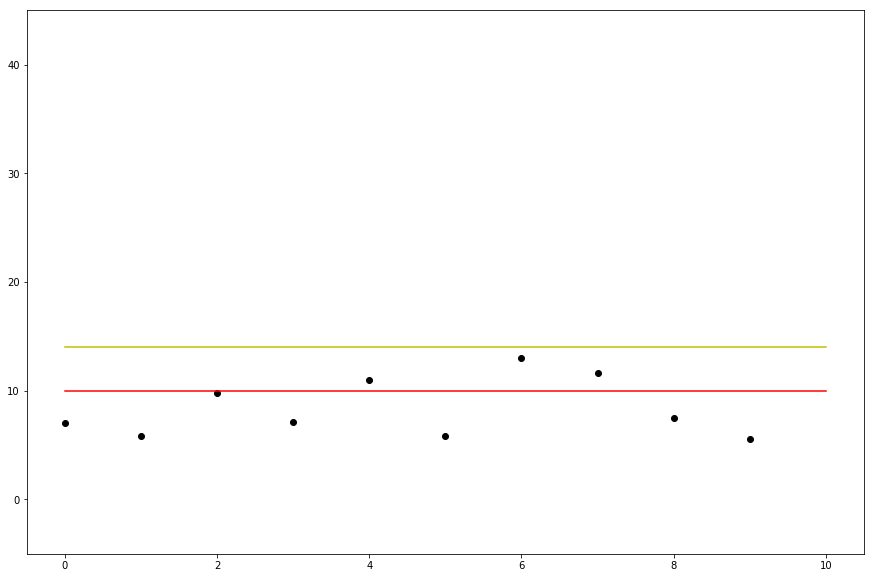

r1: 15, r2: 8, >r2: 0.
../results/dibene-barely-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 and 2 


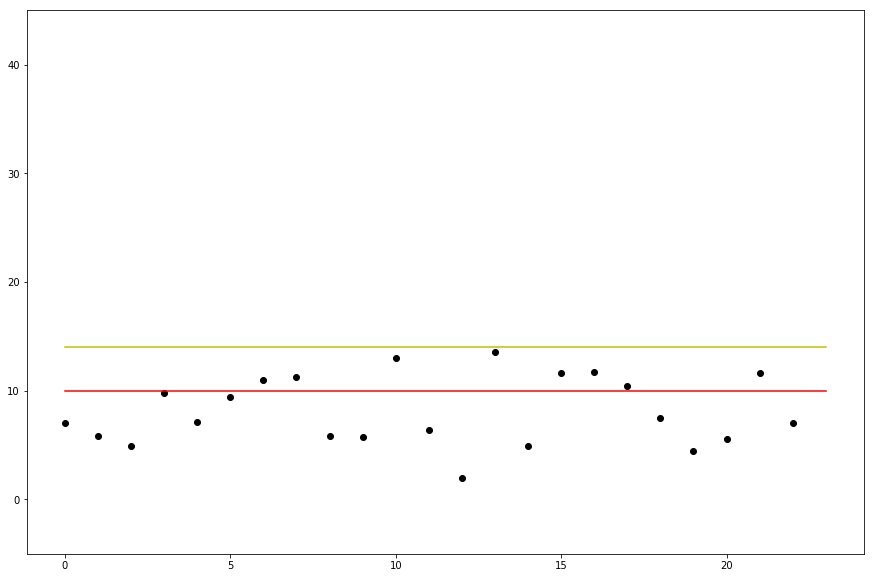

<built-in function min> (49.0, 49.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (369, (62.0, 60.0))
61.964285714285715
59.34761904761905
../results/dibene-barely-freq-best-travel-times/Coverages Overlayed


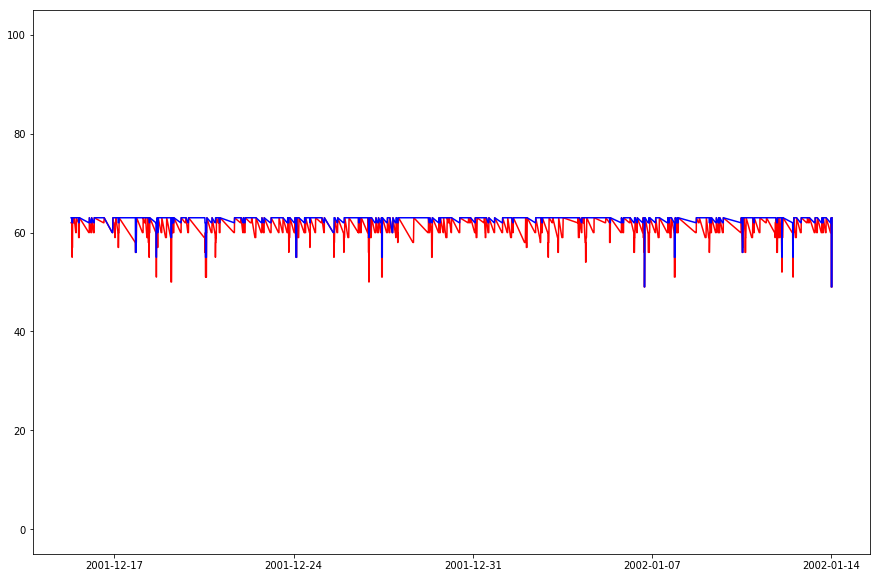

../results/dibene-barely-freq-best-travel-times/Total Case Delay in Minutes


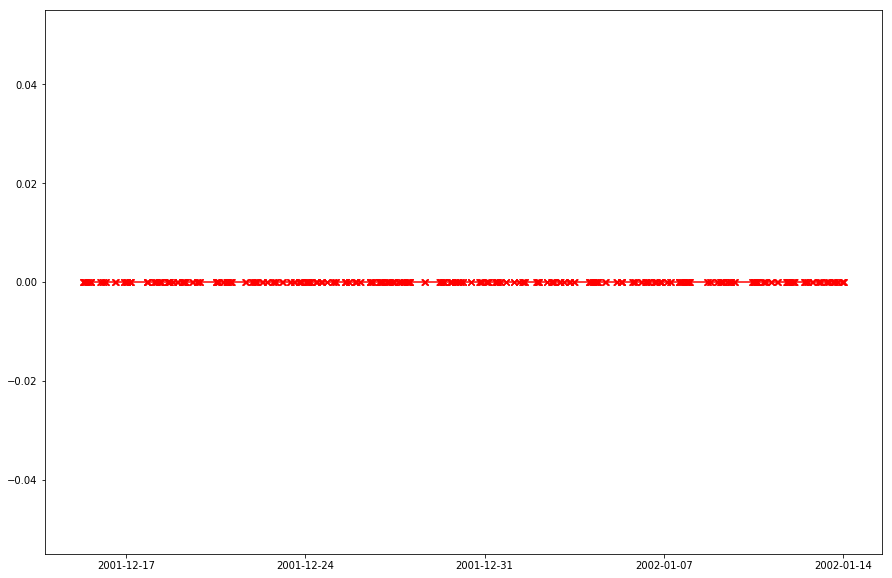

../results/dibene-barely-freq-best-travel-times/Total number of cases being delayed


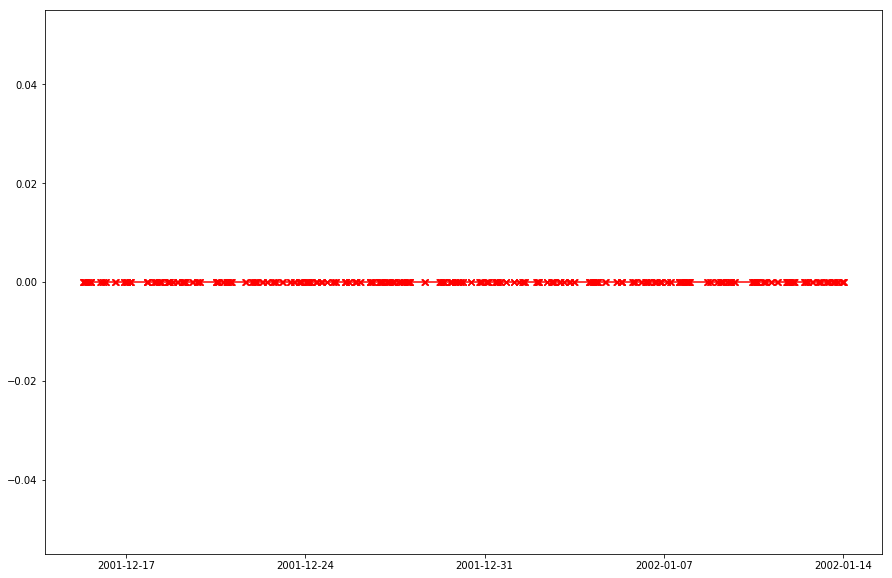

********************************************************************************






********************************************************************************
r1: 31, r2: 54, >r2: 125.
../results/dibene-barely-freq-least-disruption/Time from Base to Emergency in Minutes


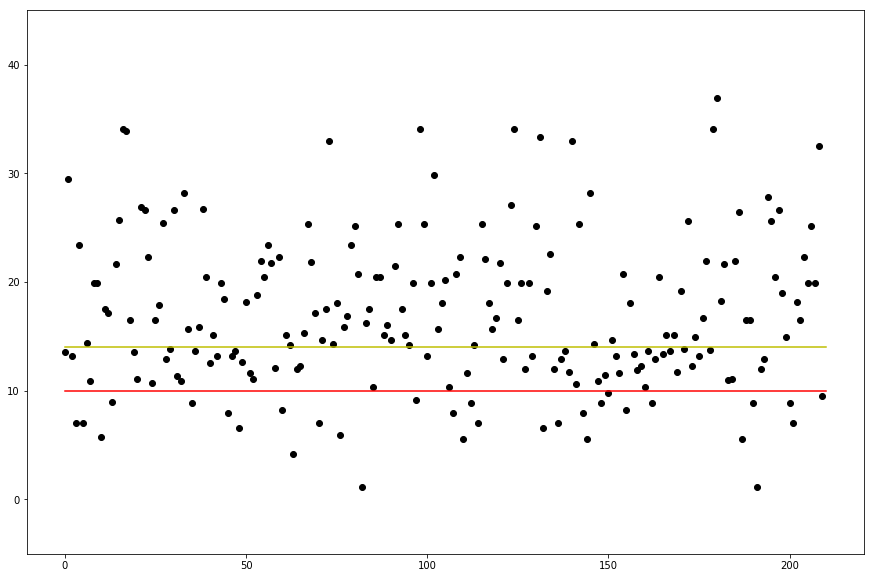

r1: 1, r2: 1, >r2: 8.
../results/dibene-barely-freq-least-disruption/Time from Base to Emergency in Minutes - Priority 1 Only


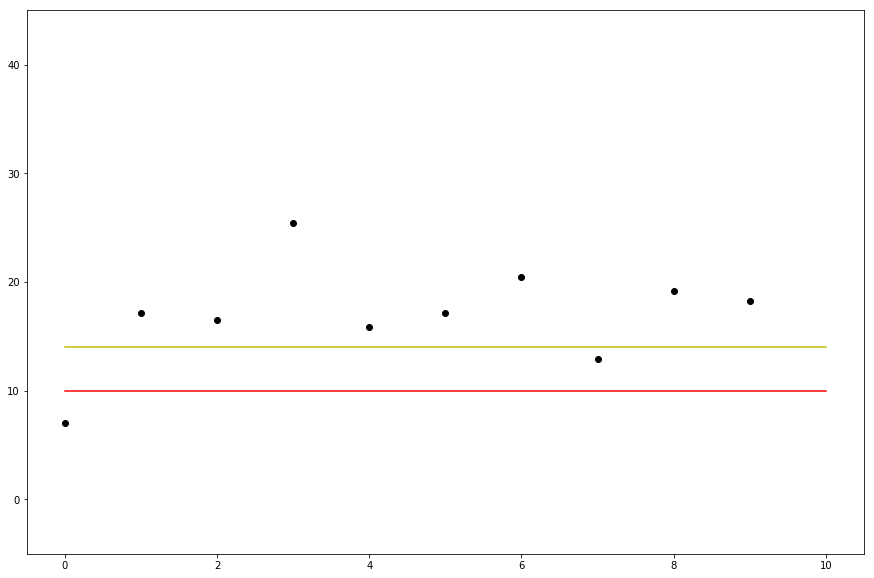

r1: 2, r2: 4, >r2: 17.
../results/dibene-barely-freq-least-disruption/Time from Base to Emergency in Minutes - Priority 1 and 2 


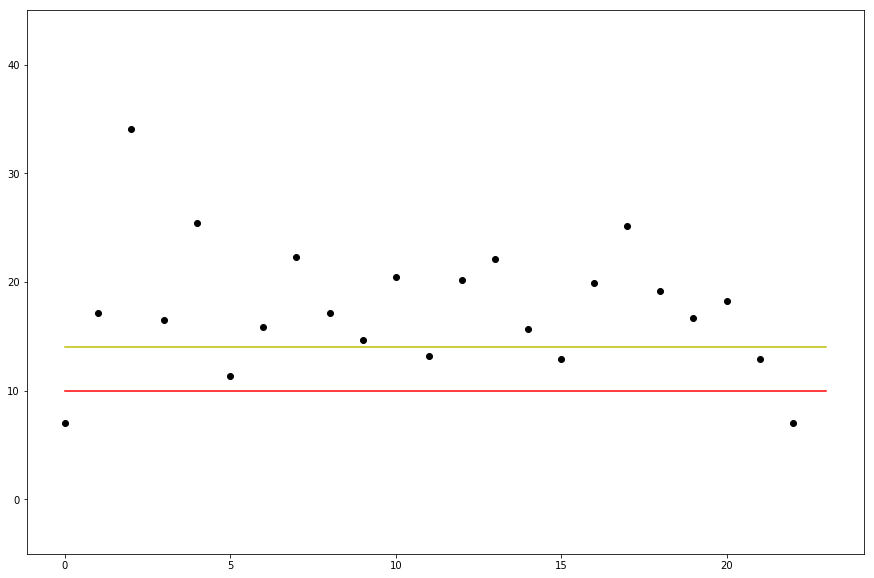

<built-in function min> (63.0, 55.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (656, (63.0, 62.0))
63.0
60.642857142857146
../results/dibene-barely-freq-least-disruption/Coverages Overlayed


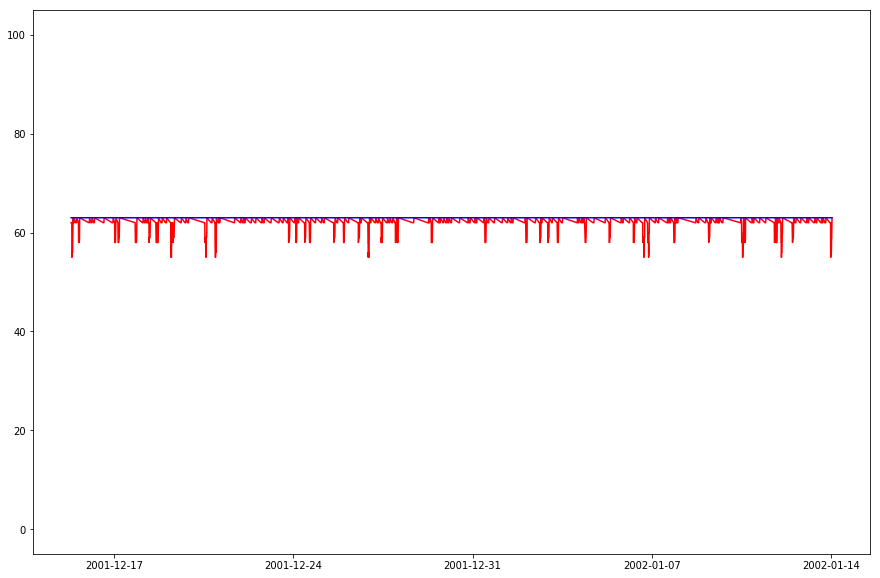

../results/dibene-barely-freq-least-disruption/Total Case Delay in Minutes


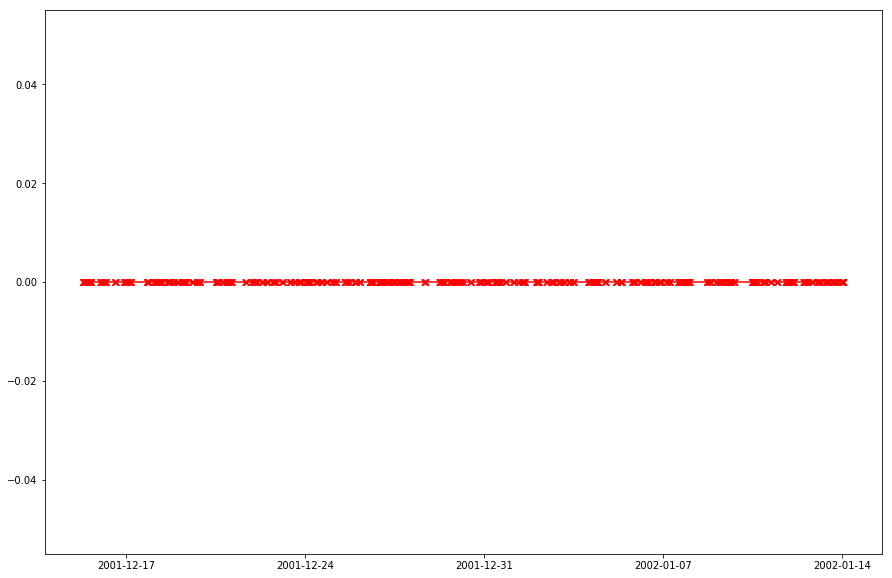

../results/dibene-barely-freq-least-disruption/Total number of cases being delayed


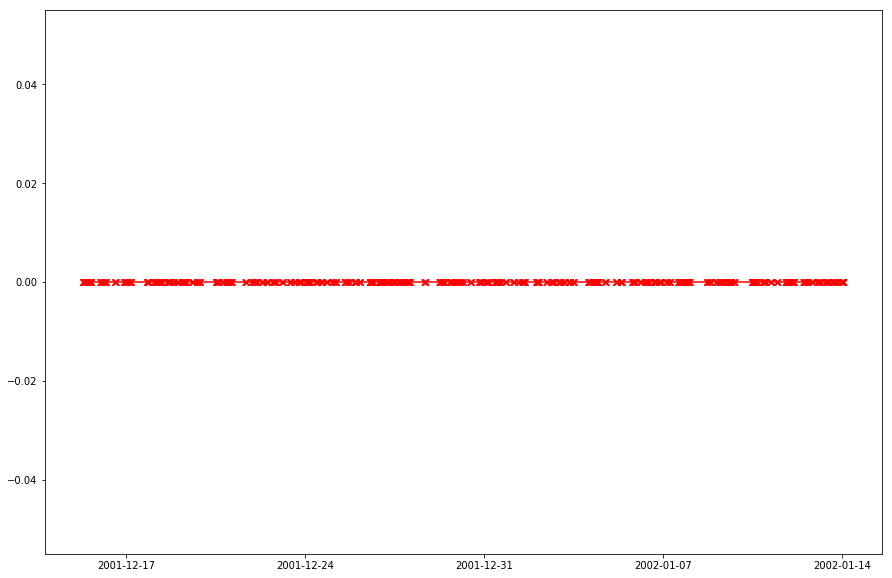

********************************************************************************






********************************************************************************
r1: 144, r2: 65, >r2: 1.
../results/dibene-barely-freq-optimal-dispatch/Time from Base to Emergency in Minutes


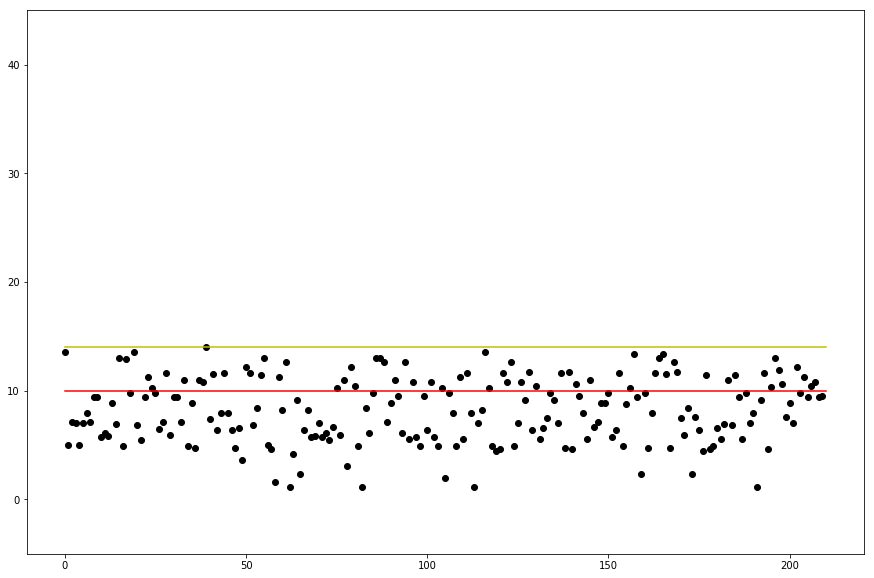

r1: 7, r2: 3, >r2: 0.
../results/dibene-barely-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 Only


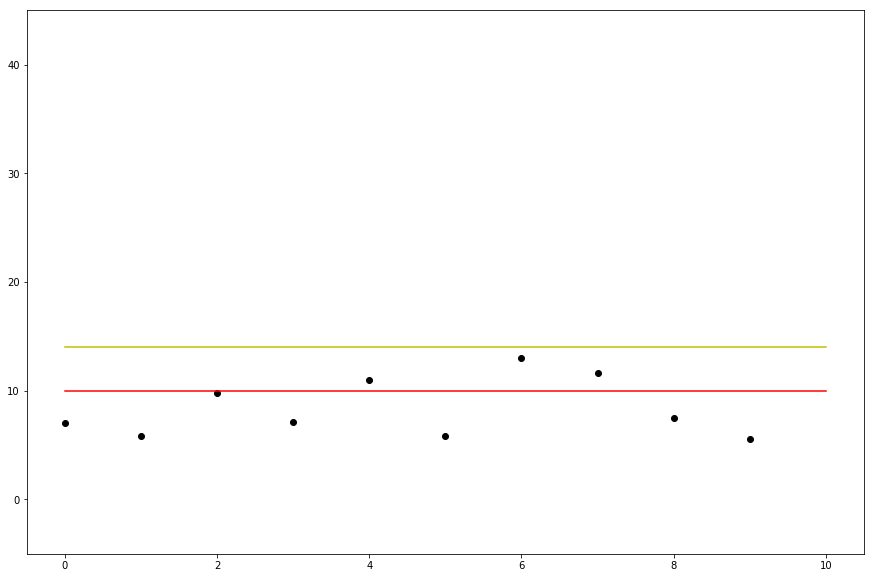

r1: 15, r2: 8, >r2: 0.
../results/dibene-barely-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 and 2 


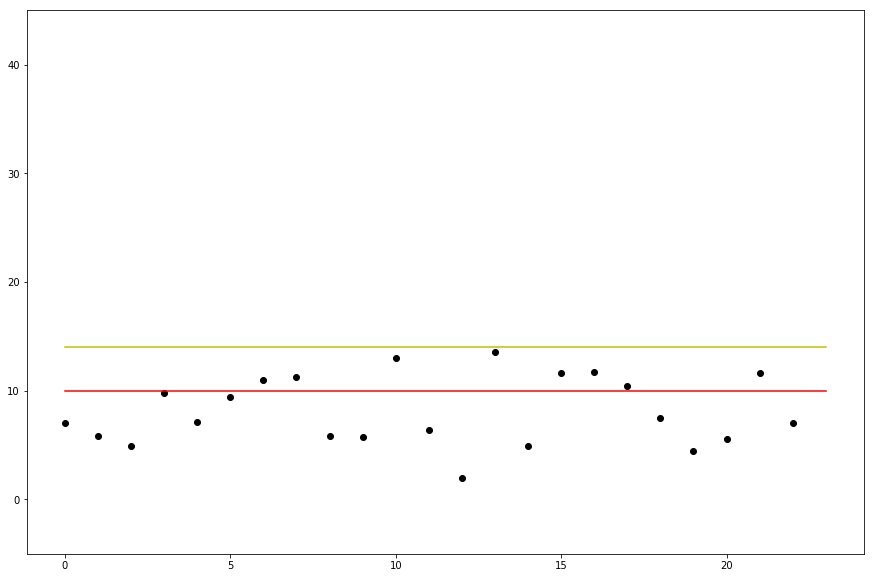

<built-in function min> (49.0, 49.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (346, (62.0, 60.0))
62.243650793650794
59.47063492063492
../results/dibene-barely-freq-optimal-dispatch/Coverages Overlayed


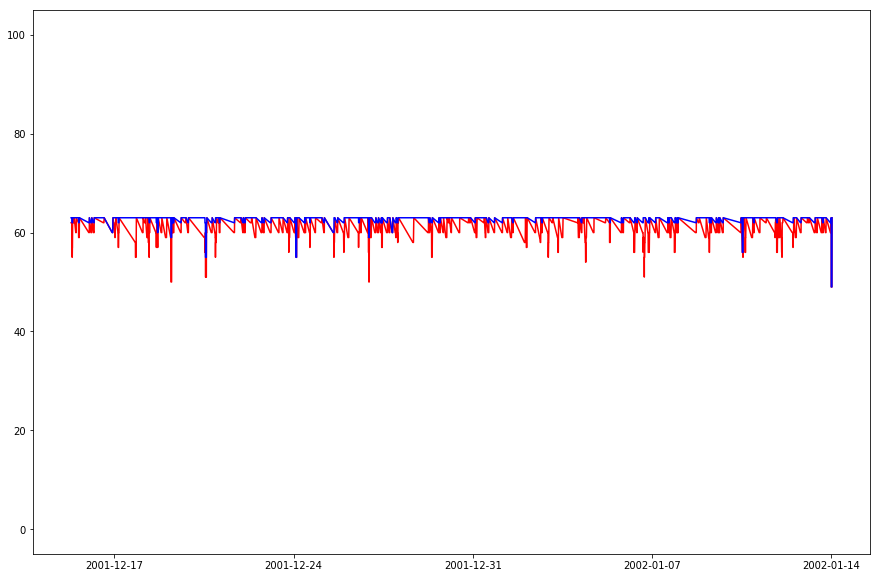

../results/dibene-barely-freq-optimal-dispatch/Total Case Delay in Minutes


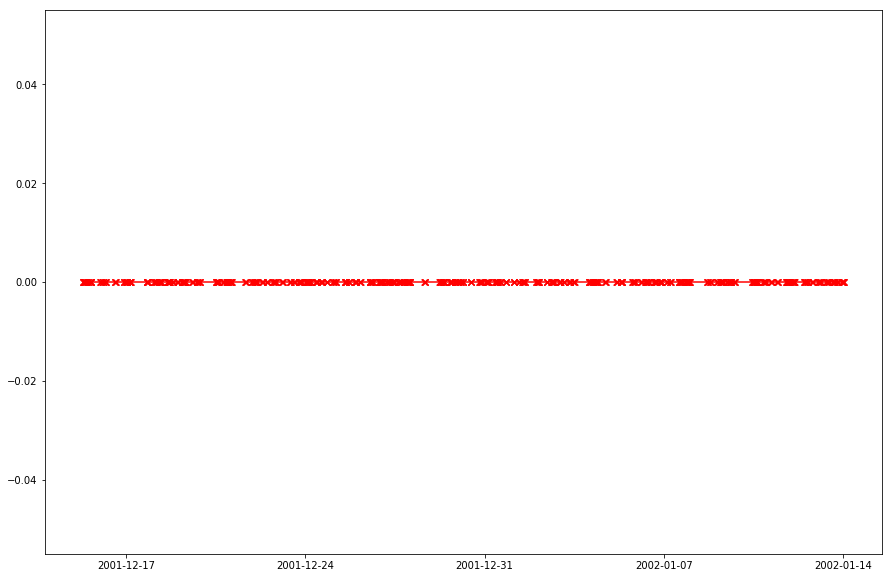

../results/dibene-barely-freq-optimal-dispatch/Total number of cases being delayed


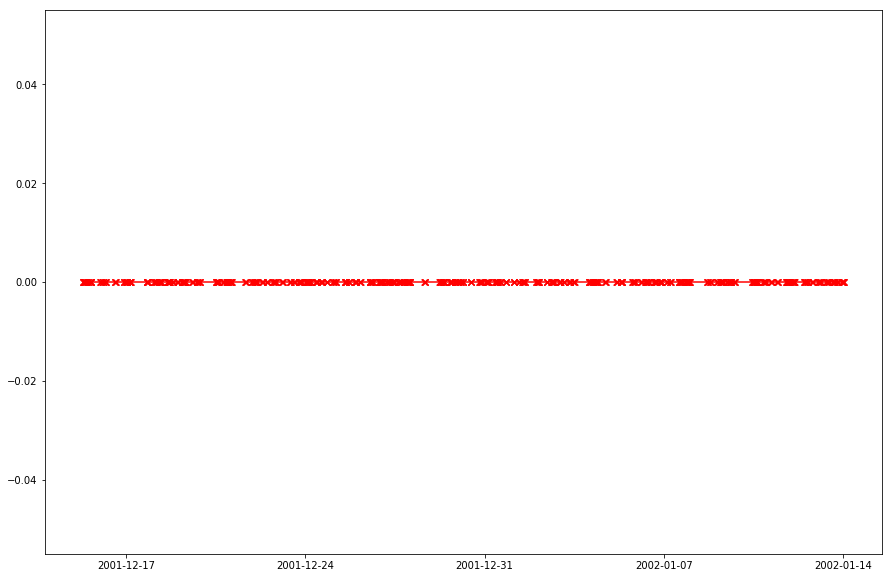

********************************************************************************








In [9]:
scenarios = [
    "dibene-barely-freq-best-travel-times",  
    "dibene-barely-freq-least-disruption",  
    "dibene-barely-freq-optimal-dispatch",
]

results_path = ["../results/{}/".format(name) for name in scenarios]
figures_path = ["../figures/{} - ".format(name) for name in scenarios]

stats = []

intensity = 'Low'
for i in range(len(scenarios)):
    s = graph(results_path[i], figures_path[i], intensity, dispatch_policy[i] )
    stats.append(s)


********************************************************************************
r1: 502, r2: 187, >r2: 1.
../results/dibene-low-freq-best-travel-times/Time from Base to Emergency in Minutes


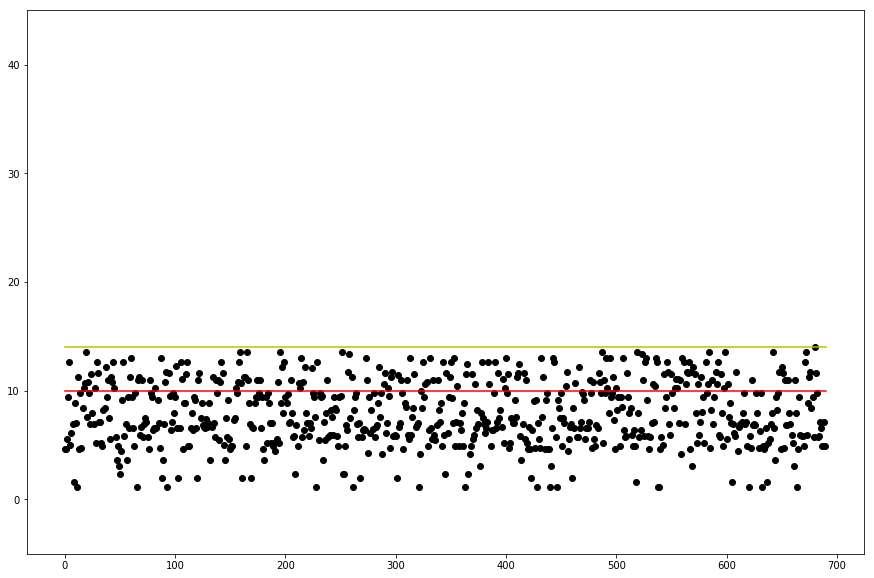

r1: 10, r2: 3, >r2: 0.
../results/dibene-low-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 Only


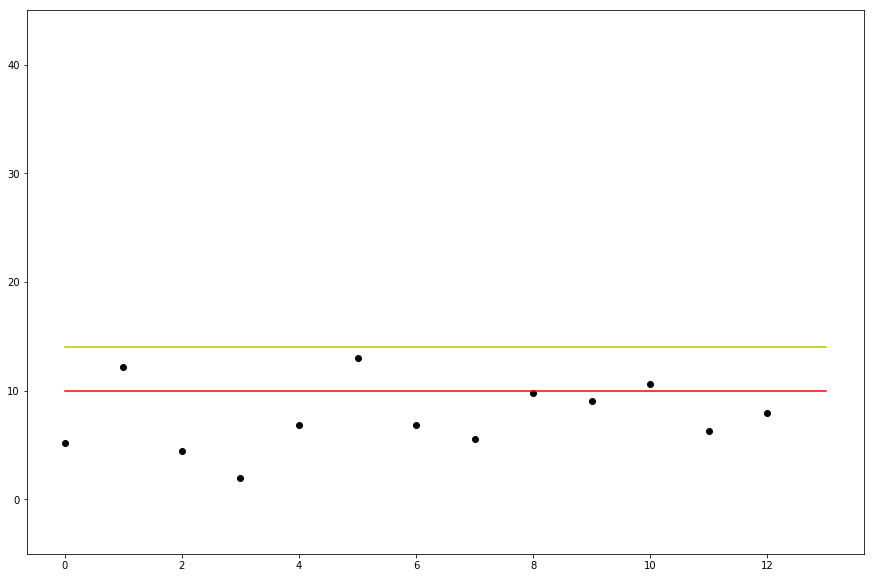

r1: 19, r2: 7, >r2: 0.
../results/dibene-low-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 and 2 


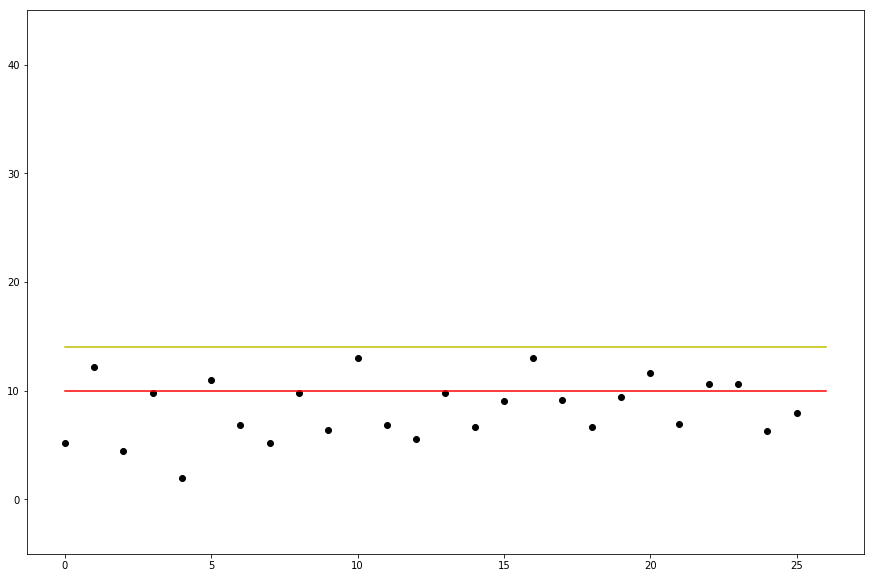

<built-in function min> (45.0, 45.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (830, (62.0, 60.0))
61.145893719806764
57.33816425120773
../results/dibene-low-freq-best-travel-times/Coverages Overlayed


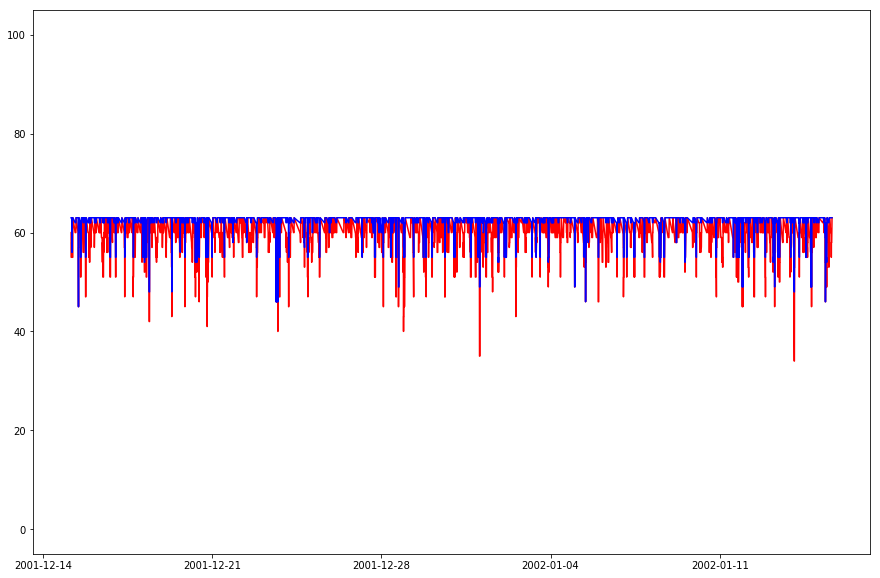

../results/dibene-low-freq-best-travel-times/Total Case Delay in Minutes


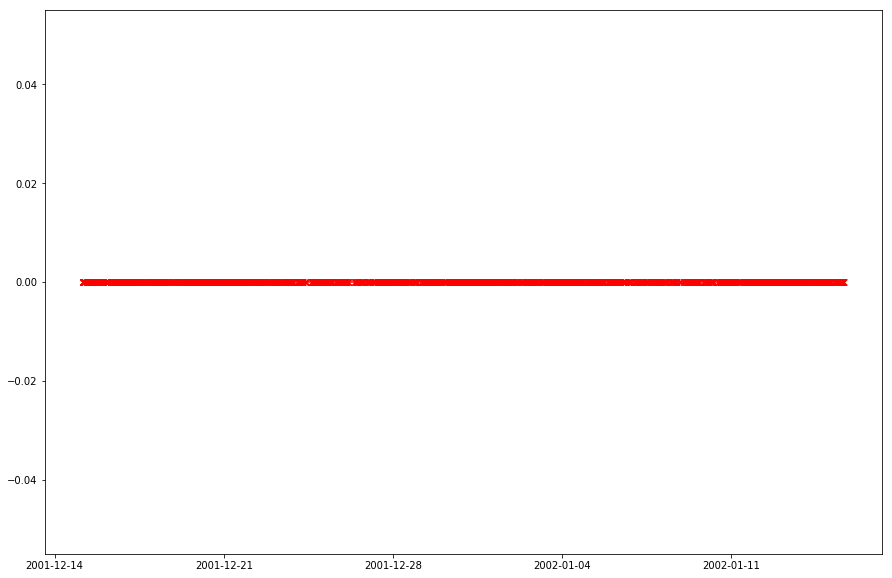

../results/dibene-low-freq-best-travel-times/Total number of cases being delayed


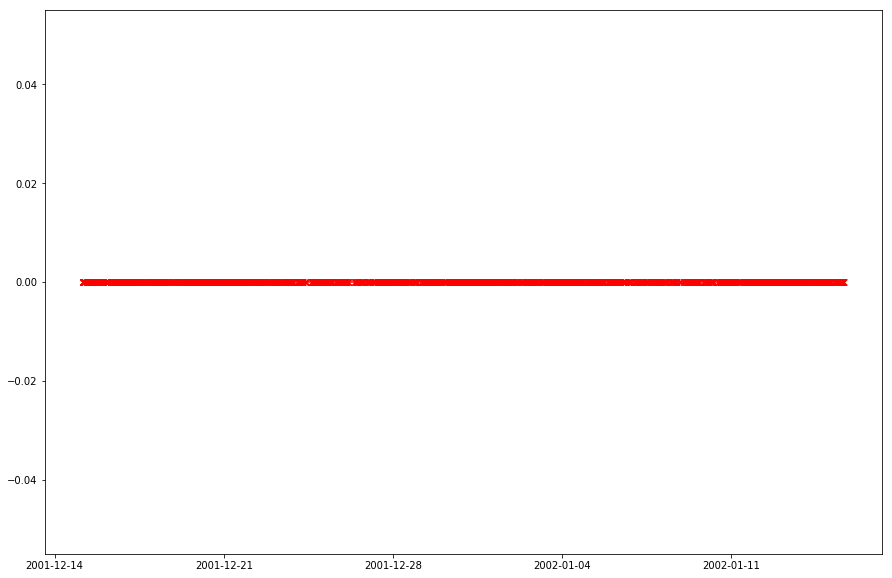

********************************************************************************






********************************************************************************
r1: 96, r2: 146, >r2: 448.
../results/dibene-low-freq-least-disruption/Time from Base to Emergency in Minutes


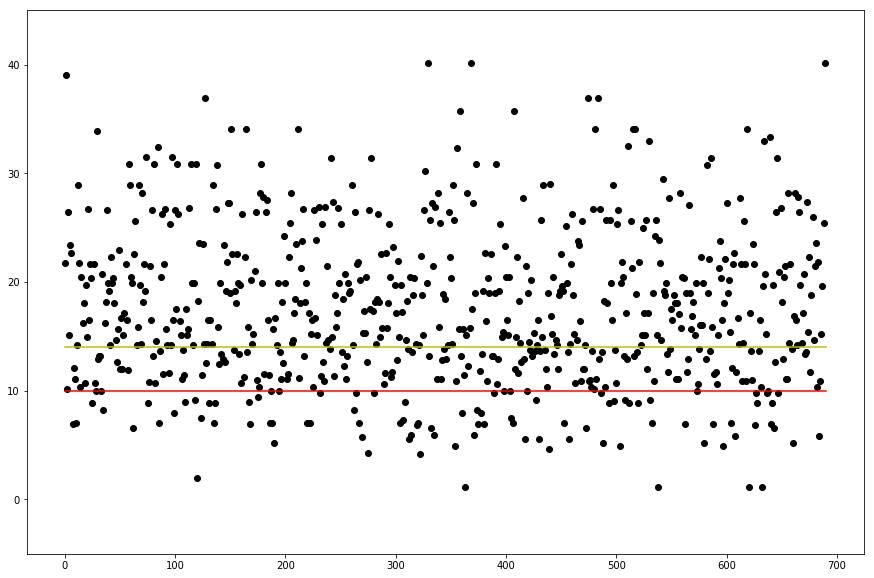

r1: 3, r2: 0, >r2: 10.
../results/dibene-low-freq-least-disruption/Time from Base to Emergency in Minutes - Priority 1 Only


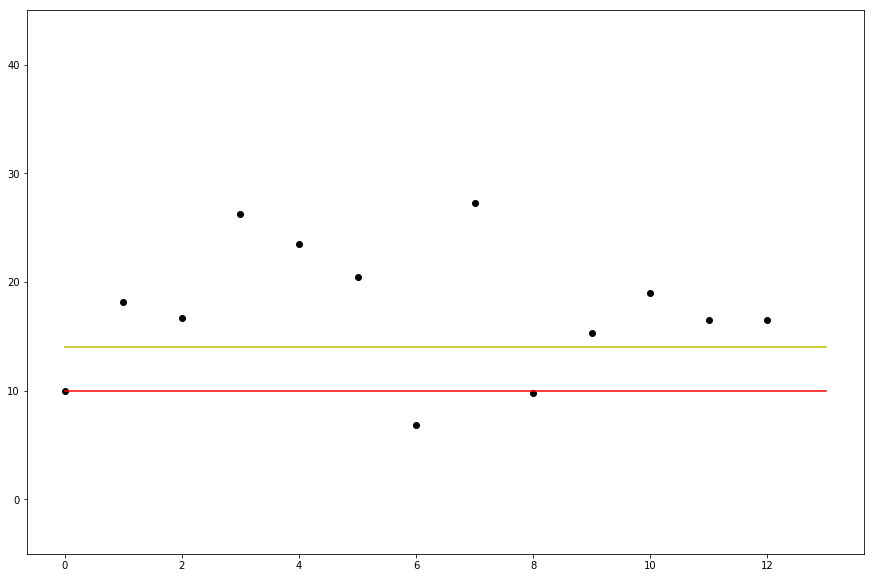

r1: 5, r2: 3, >r2: 18.
../results/dibene-low-freq-least-disruption/Time from Base to Emergency in Minutes - Priority 1 and 2 


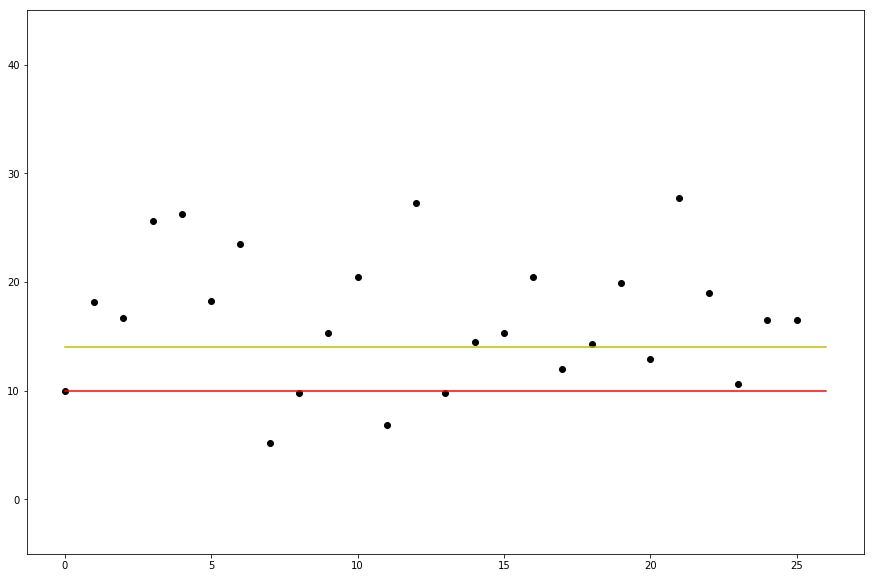

<built-in function min> (62.0, 47.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (1181, (63.0, 62.0))
62.990338164251206
58.56256038647343
../results/dibene-low-freq-least-disruption/Coverages Overlayed


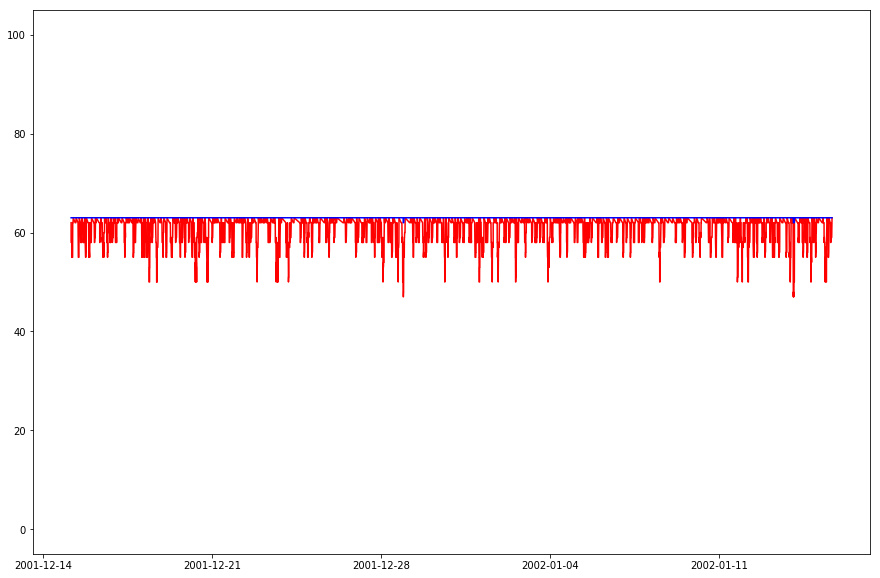

../results/dibene-low-freq-least-disruption/Total Case Delay in Minutes


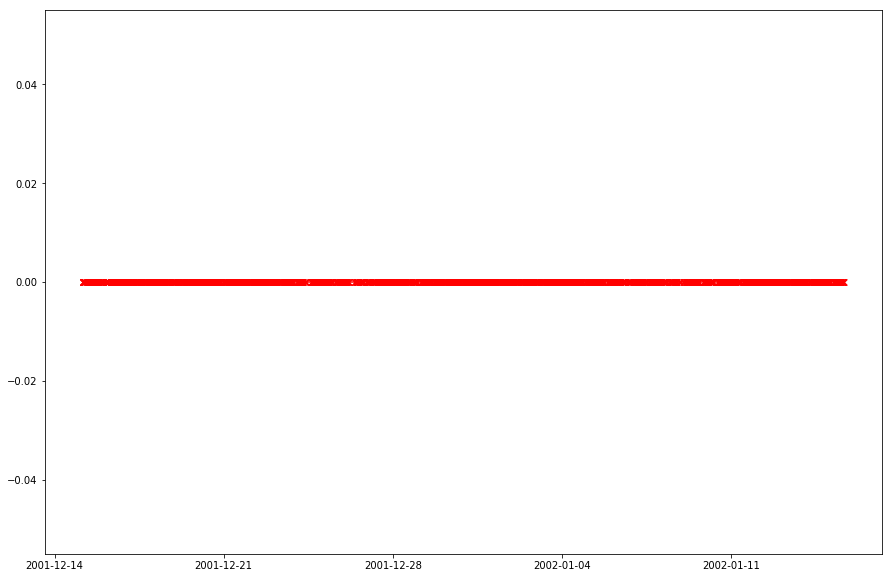

../results/dibene-low-freq-least-disruption/Total number of cases being delayed


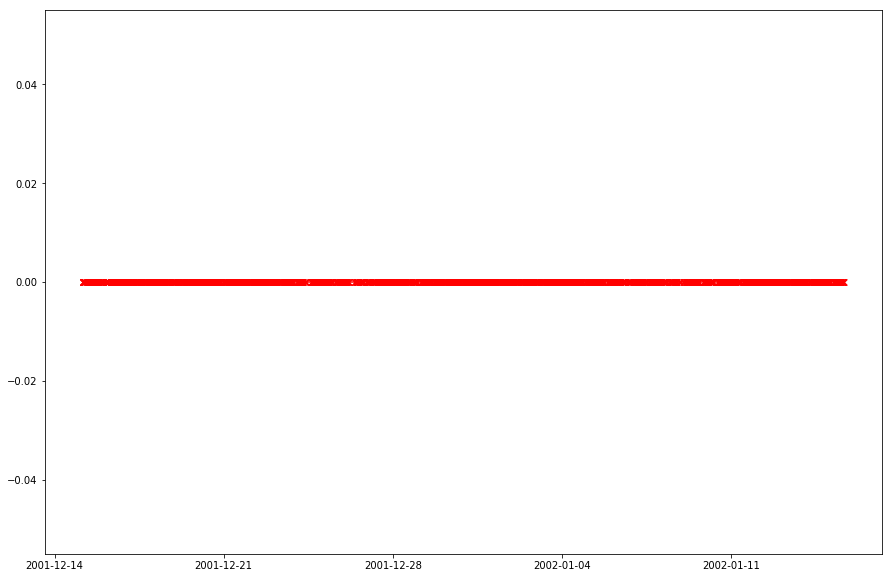

********************************************************************************






********************************************************************************
r1: 495, r2: 194, >r2: 1.
../results/dibene-low-freq-optimal-dispatch/Time from Base to Emergency in Minutes


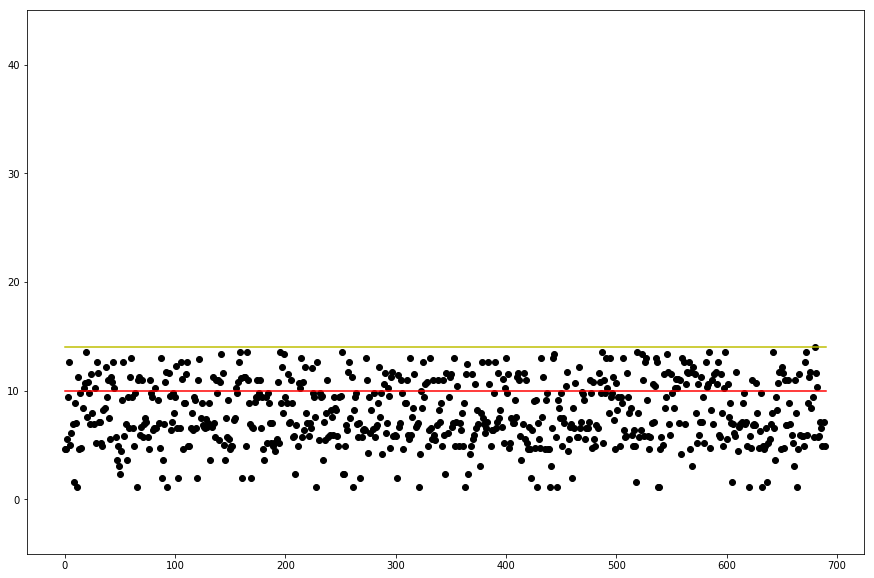

r1: 10, r2: 3, >r2: 0.
../results/dibene-low-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 Only


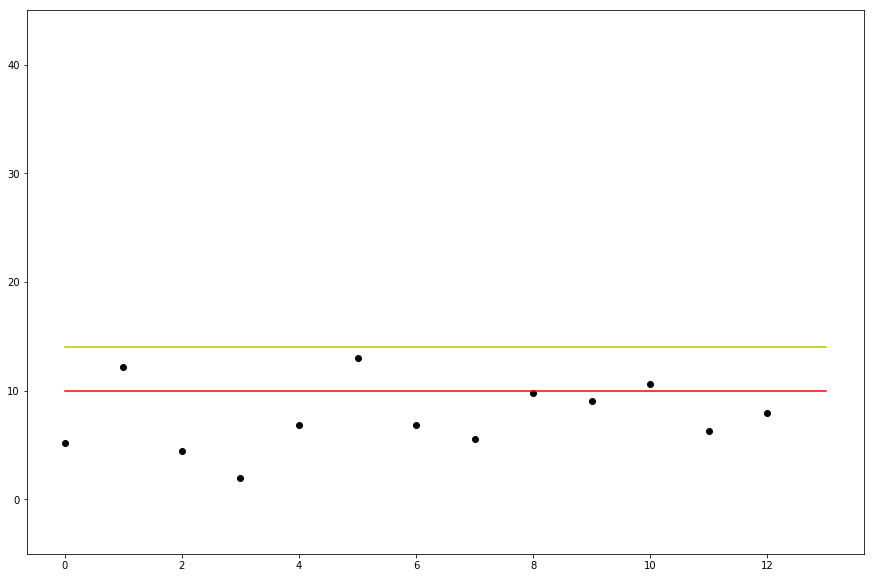

r1: 19, r2: 7, >r2: 0.
../results/dibene-low-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 and 2 


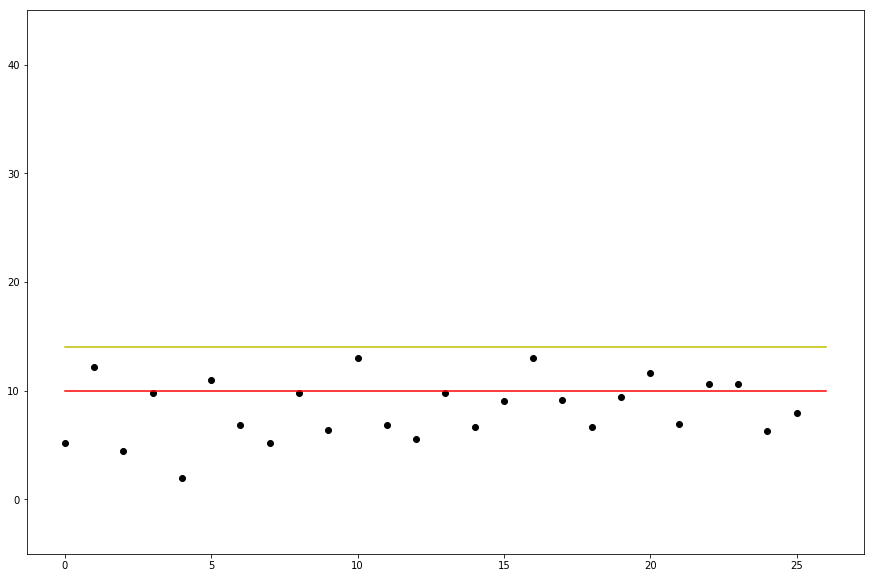

<built-in function min> (45.0, 45.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (764, (62.0, 60.0))
61.464009661835746
57.48888888888889
../results/dibene-low-freq-optimal-dispatch/Coverages Overlayed


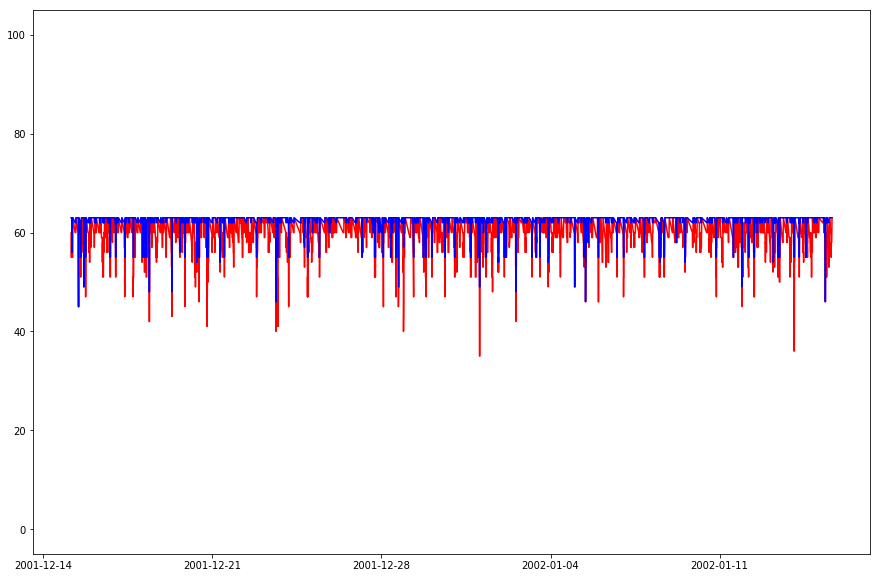

../results/dibene-low-freq-optimal-dispatch/Total Case Delay in Minutes


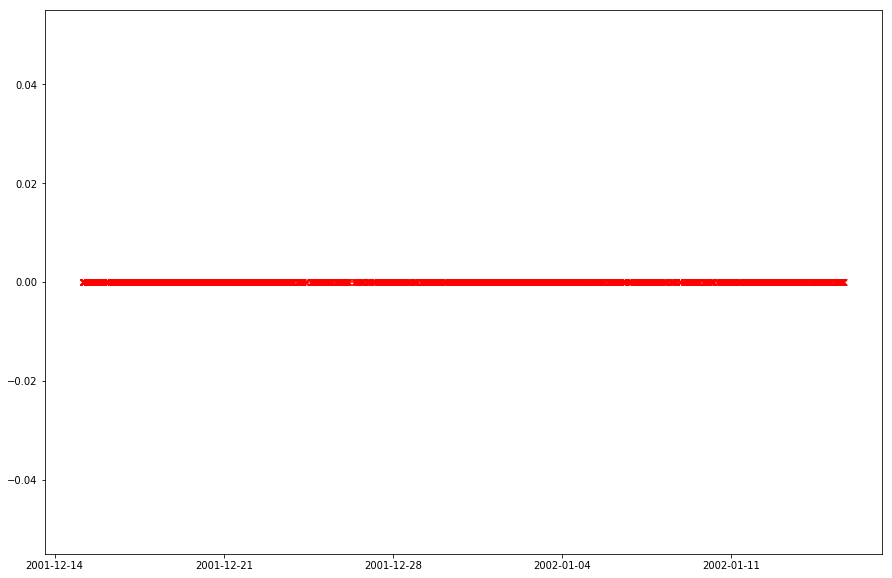

../results/dibene-low-freq-optimal-dispatch/Total number of cases being delayed


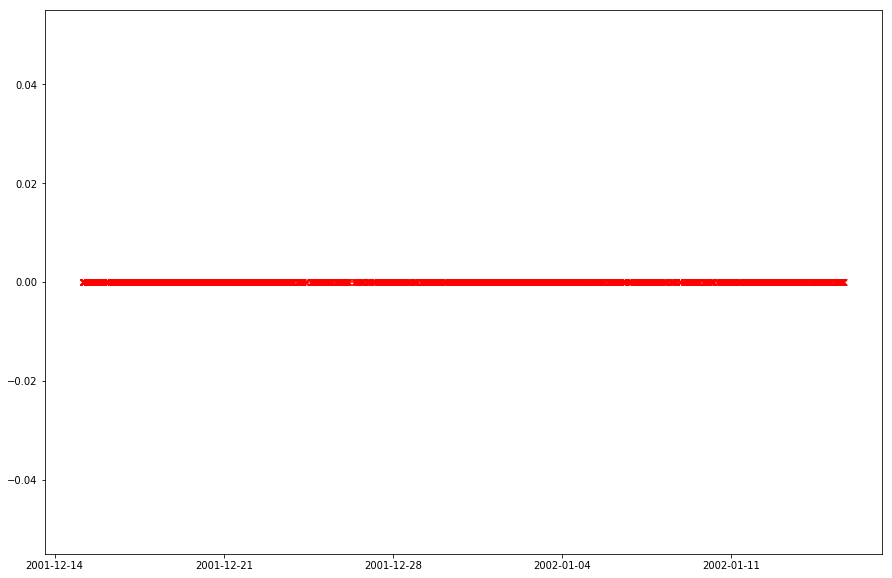

********************************************************************************








In [10]:
scenarios = [
        "dibene-low-freq-best-travel-times",  
        "dibene-low-freq-least-disruption",  
        "dibene-low-freq-optimal-dispatch",
    ]

results_path = ["../results/{}/".format(name) for name in scenarios]
figures_path = ["../figures/{} - ".format(name) for name in scenarios]


intensity = 'Medium Low'
for i in range(len(scenarios)):
    s = graph(results_path[i], figures_path[i], intensity, dispatch_policy[i] )
    stats.append(s)

********************************************************************************
r1: 998, r2: 379, >r2: 33.
../results/dibene-med-freq-best-travel-times/Time from Base to Emergency in Minutes


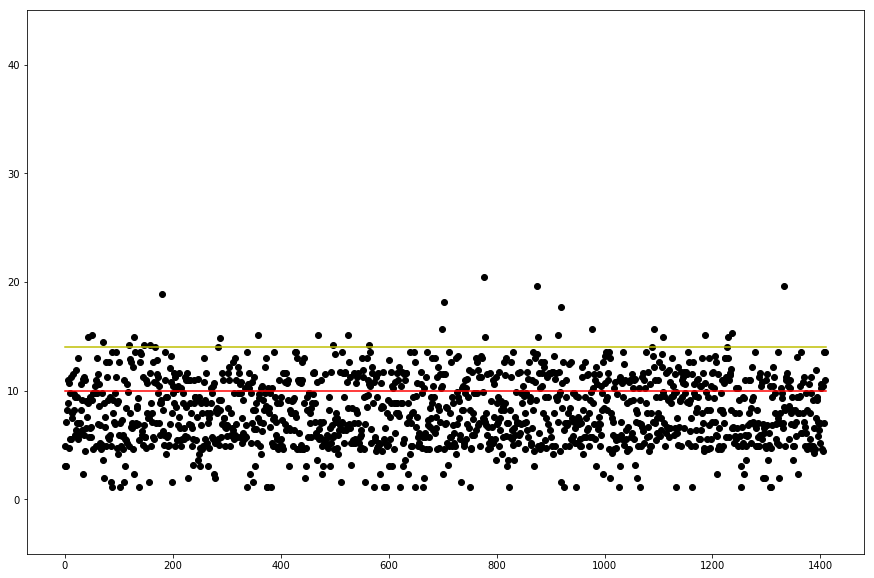

r1: 35, r2: 13, >r2: 2.
../results/dibene-med-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 Only


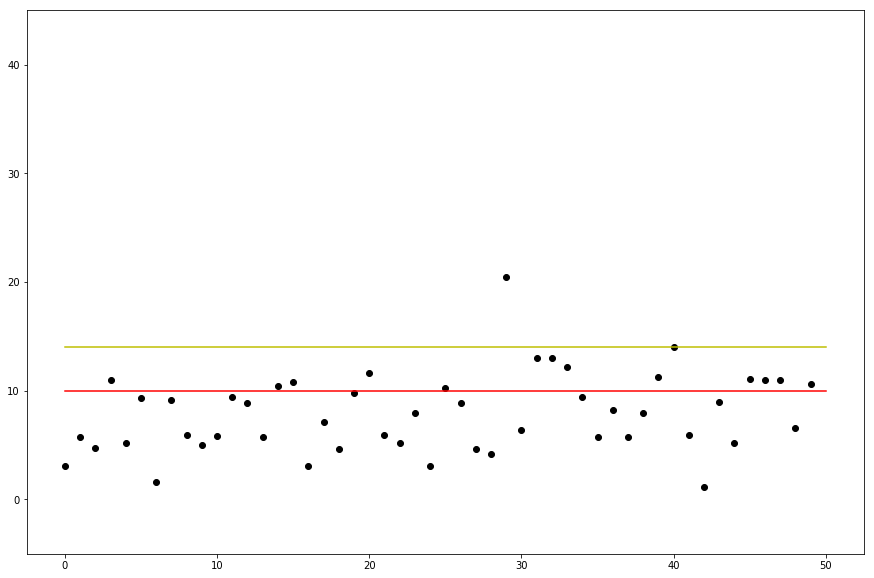

r1: 76, r2: 27, >r2: 3.
../results/dibene-med-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 and 2 


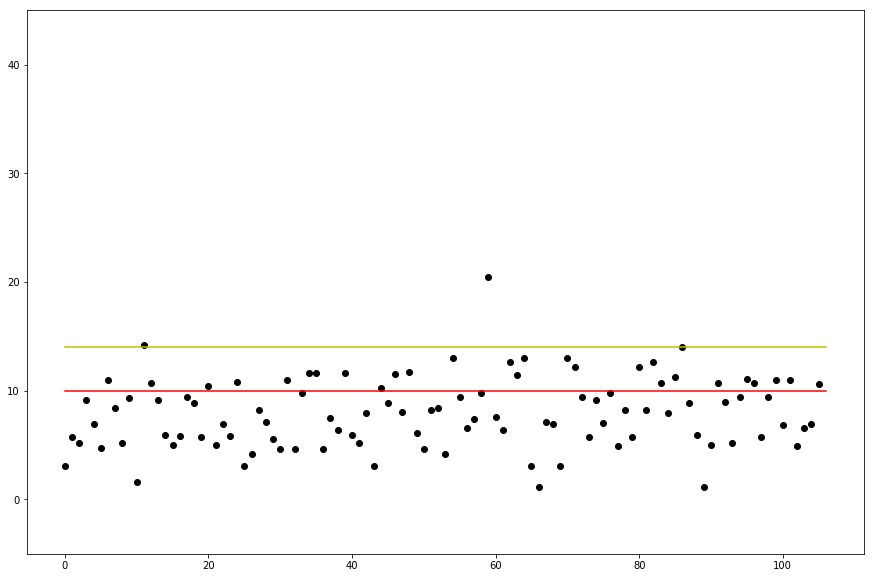

<built-in function min> (29.0, 12.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (636, (62.0, 60.0))
58.885224586288416
52.96182033096927
../results/dibene-med-freq-best-travel-times/Coverages Overlayed


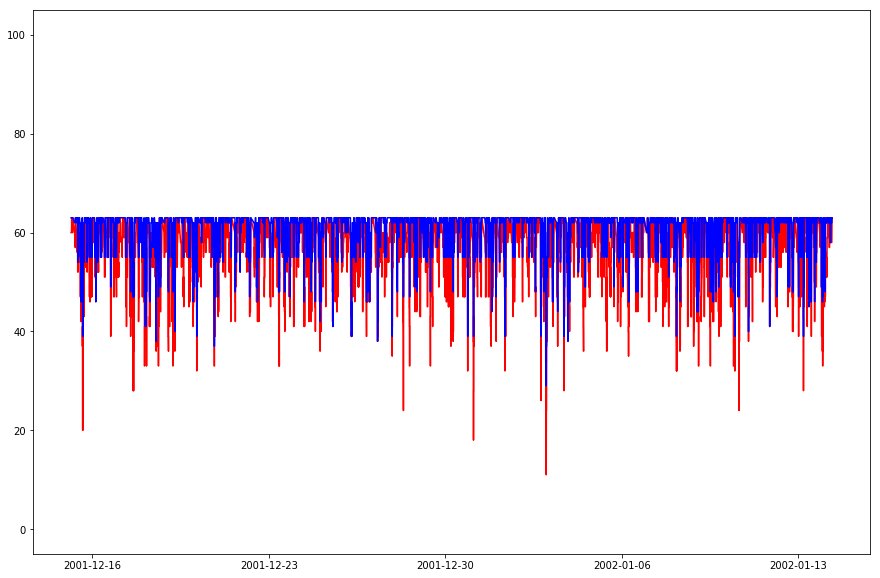

../results/dibene-med-freq-best-travel-times/Total Case Delay in Minutes


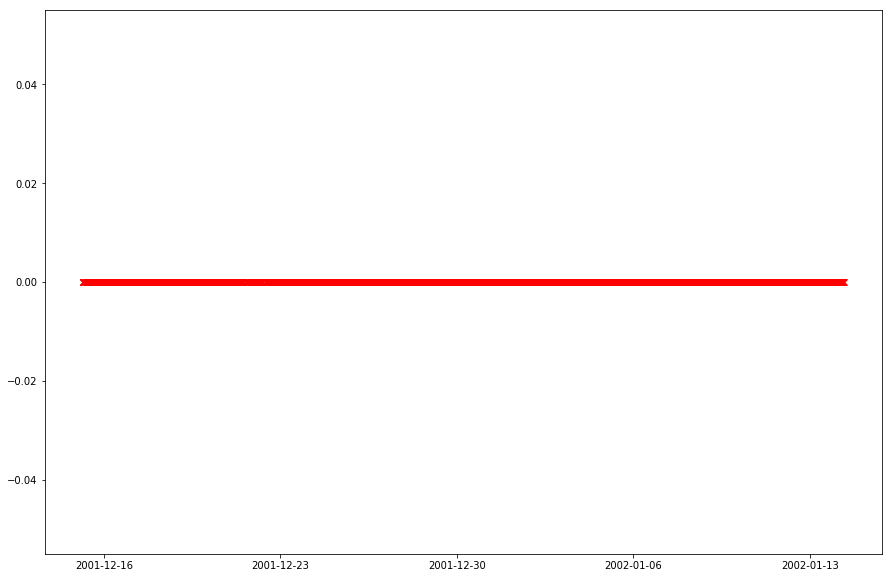

../results/dibene-med-freq-best-travel-times/Total number of cases being delayed


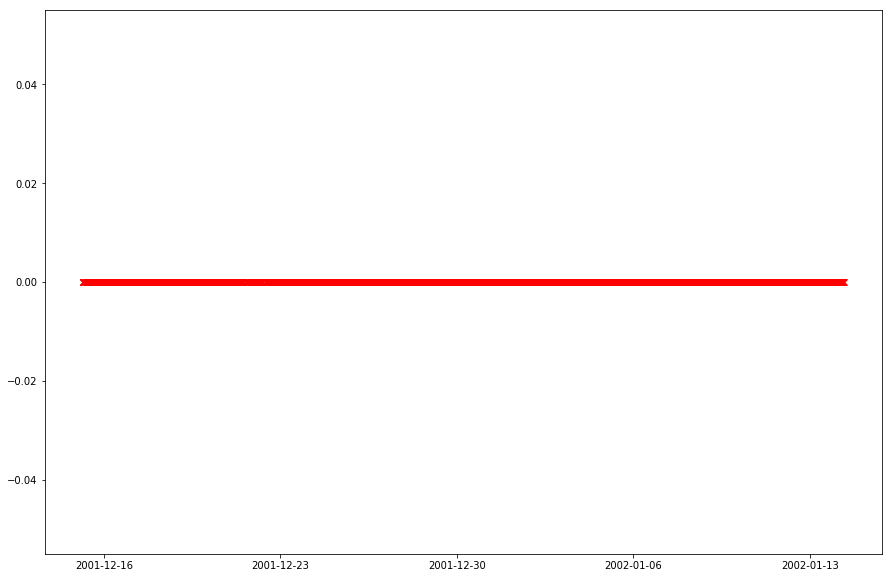

********************************************************************************






********************************************************************************
r1: 231, r2: 251, >r2: 928.
../results/dibene-med-freq-least-disruption/Time from Base to Emergency in Minutes


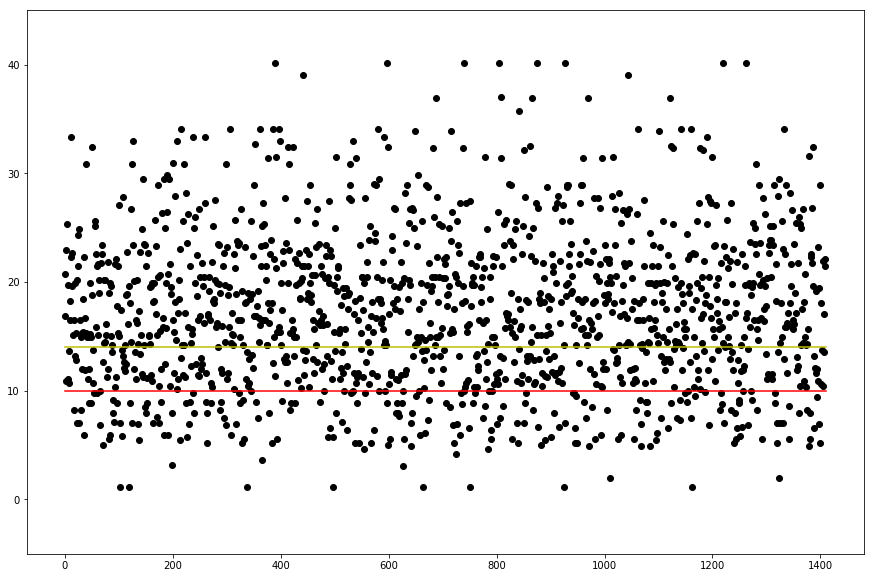

r1: 11, r2: 14, >r2: 25.
../results/dibene-med-freq-least-disruption/Time from Base to Emergency in Minutes - Priority 1 Only


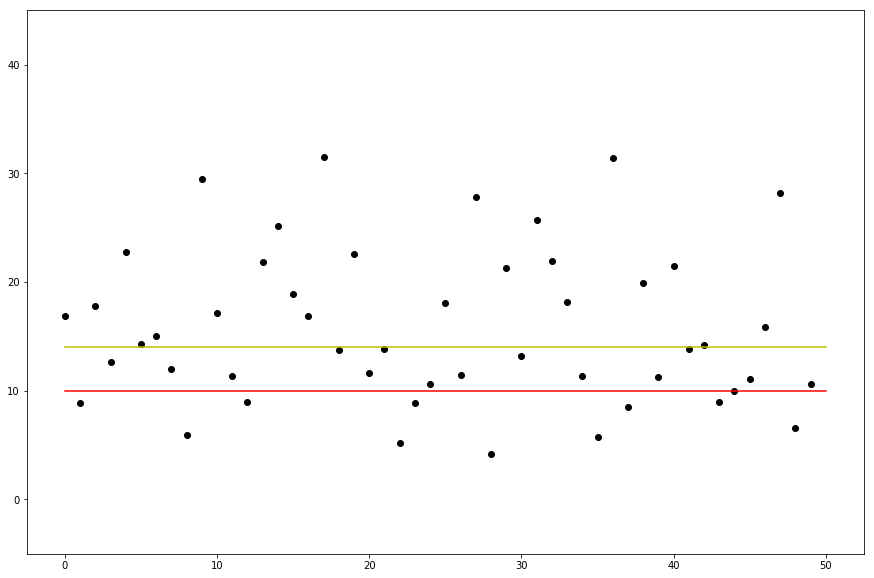

r1: 20, r2: 23, >r2: 63.
../results/dibene-med-freq-least-disruption/Time from Base to Emergency in Minutes - Priority 1 and 2 


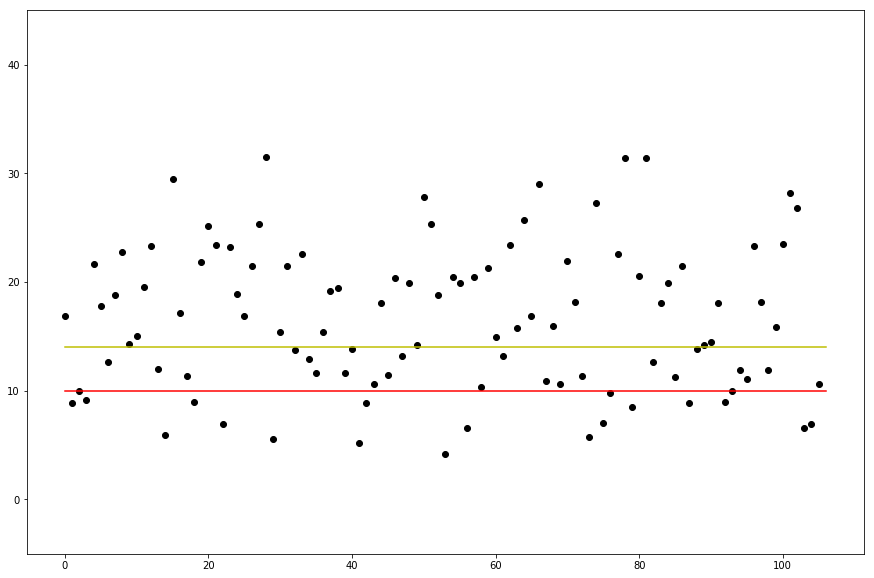

<built-in function min> (21.0, 0.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (1438, (63.0, 55.0))
62.16359338061466
54.10212765957447
../results/dibene-med-freq-least-disruption/Coverages Overlayed


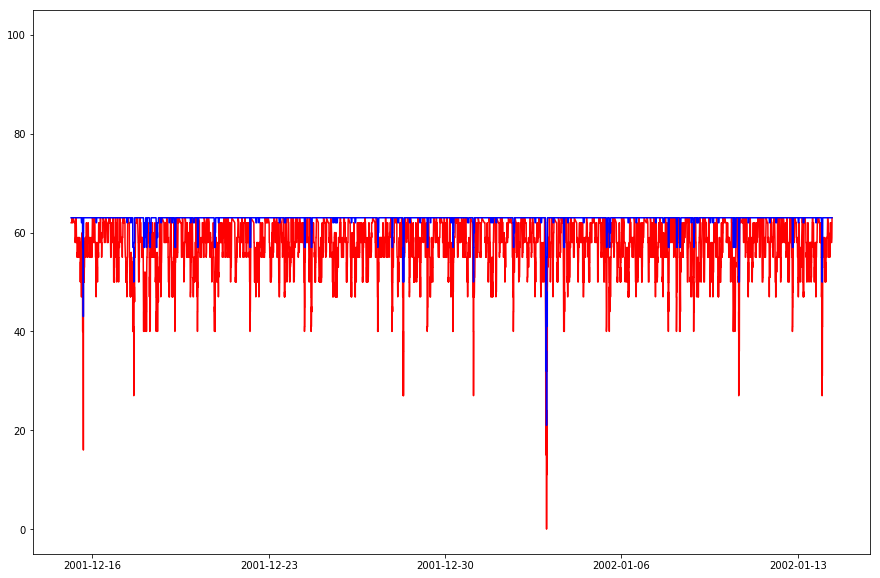

../results/dibene-med-freq-least-disruption/Total Case Delay in Minutes


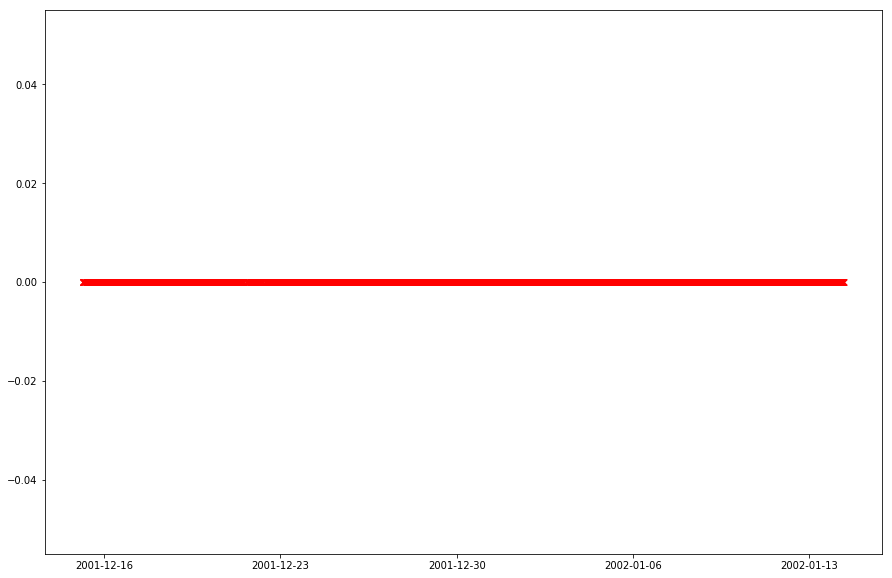

../results/dibene-med-freq-least-disruption/Total number of cases being delayed


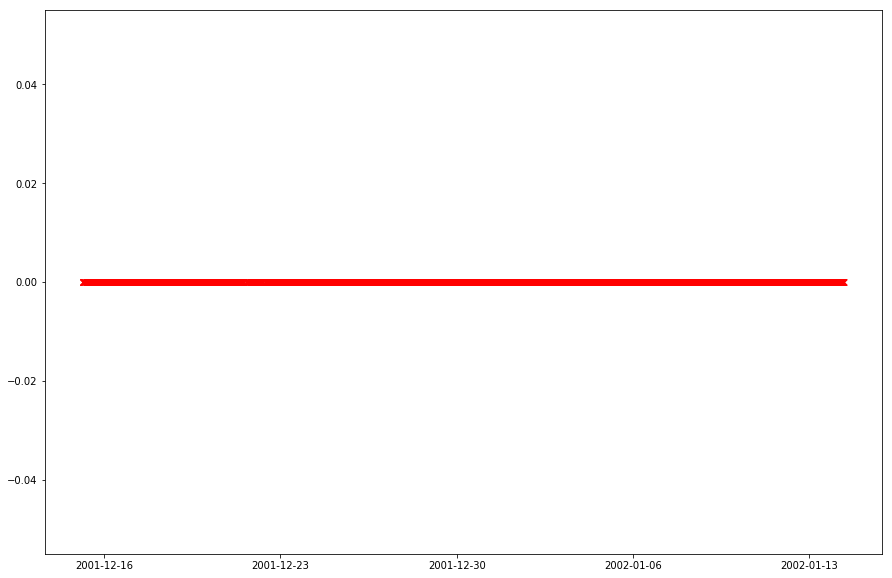

********************************************************************************






********************************************************************************
r1: 979, r2: 398, >r2: 33.
../results/dibene-med-freq-optimal-dispatch/Time from Base to Emergency in Minutes


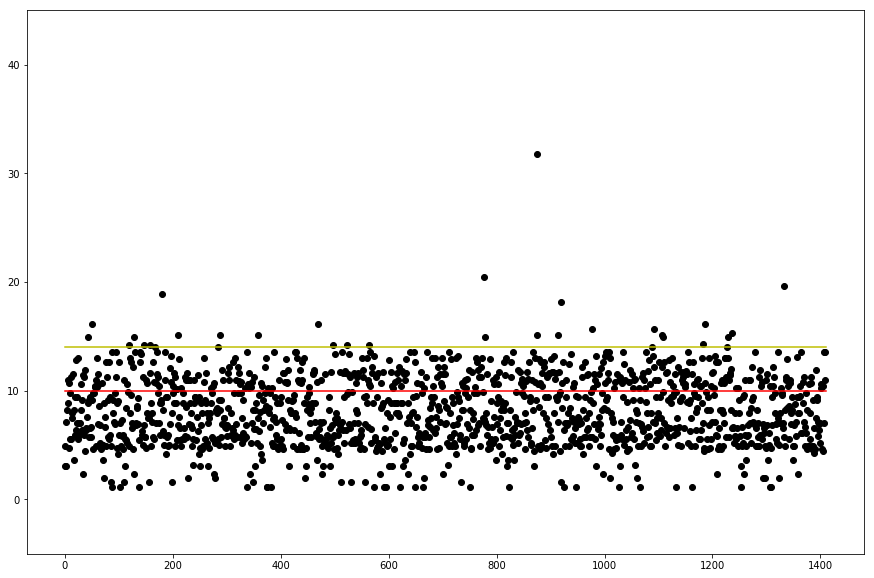

r1: 35, r2: 13, >r2: 2.
../results/dibene-med-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 Only


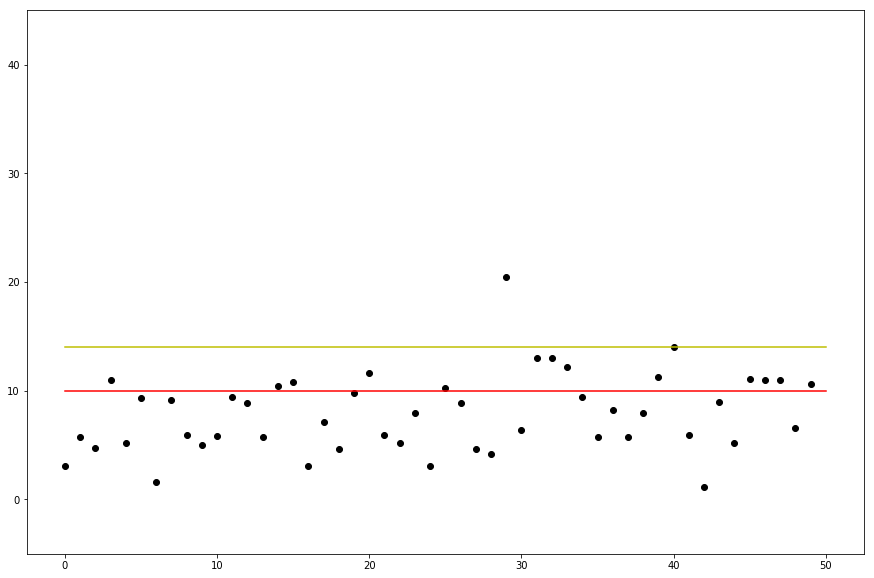

r1: 75, r2: 28, >r2: 3.
../results/dibene-med-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 and 2 


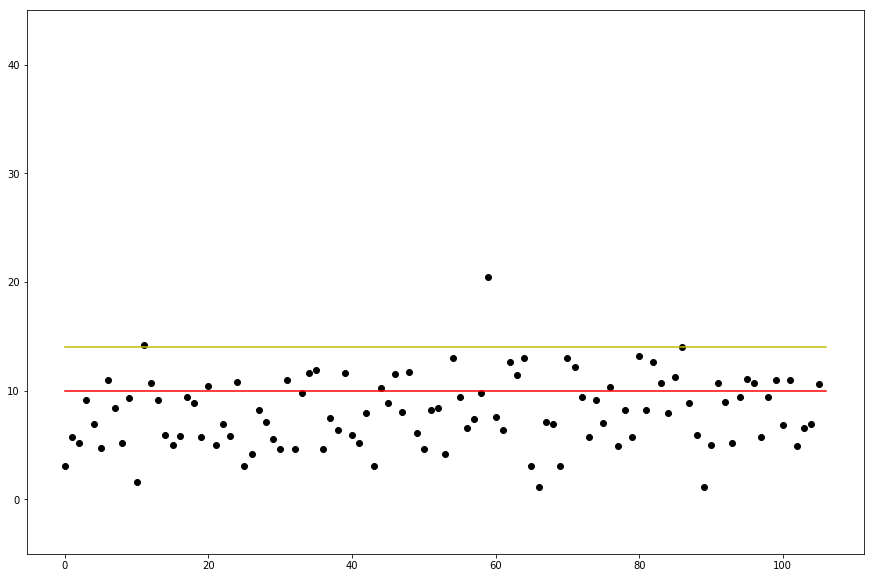

<built-in function min> (21.0, 0.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (599, (62.0, 60.0))
59.328605200945624
53.2145390070922
../results/dibene-med-freq-optimal-dispatch/Coverages Overlayed


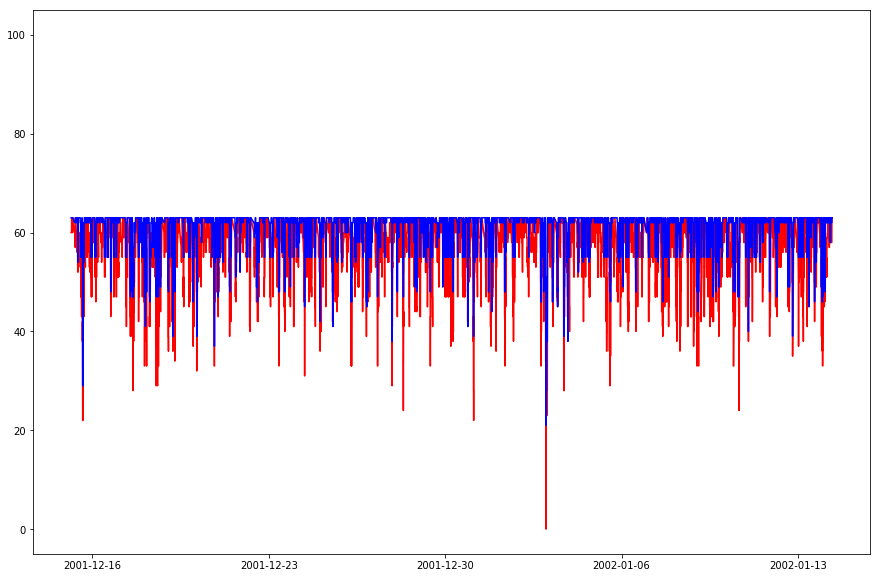

../results/dibene-med-freq-optimal-dispatch/Total Case Delay in Minutes


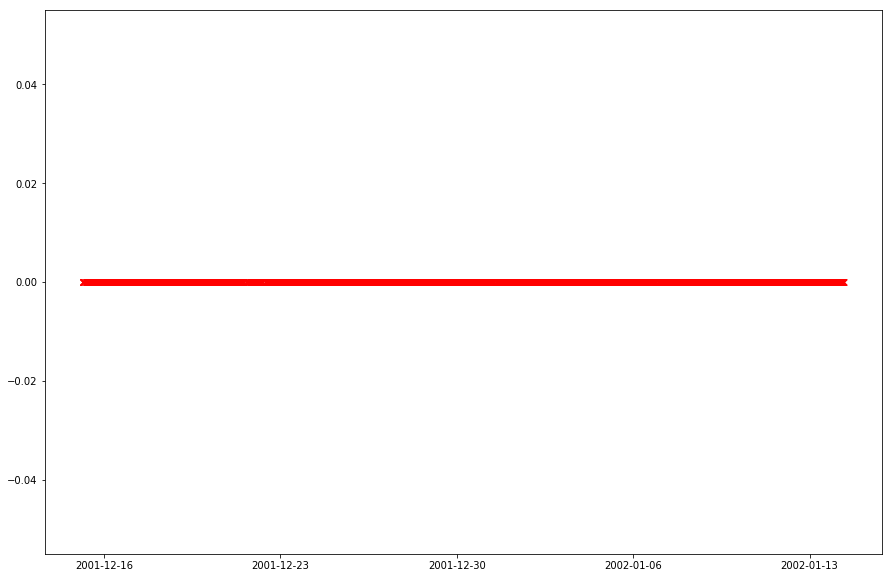

../results/dibene-med-freq-optimal-dispatch/Total number of cases being delayed


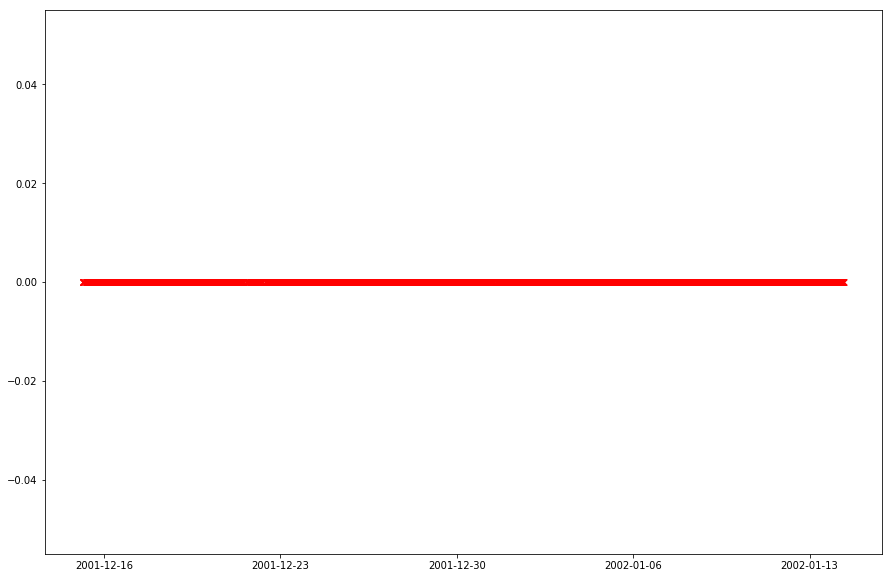

********************************************************************************








In [11]:
scenarios = [

        "dibene-med-freq-best-travel-times",  
        "dibene-med-freq-least-disruption",
        "dibene-med-freq-optimal-dispatch",

    ]


results_path = ["../results/{}/".format(name) for name in scenarios]
figures_path = ["../figures/{} - ".format(name) for name in scenarios]

intensity = 'Medium'
for i in range(len(scenarios)):
    s = graph(results_path[i], figures_path[i], intensity, dispatch_policy[i] )
    stats.append(s)

********************************************************************************
r1: 1621, r2: 640, >r2: 79.
../results/dibene-very-freq-best-travel-times/Time from Base to Emergency in Minutes


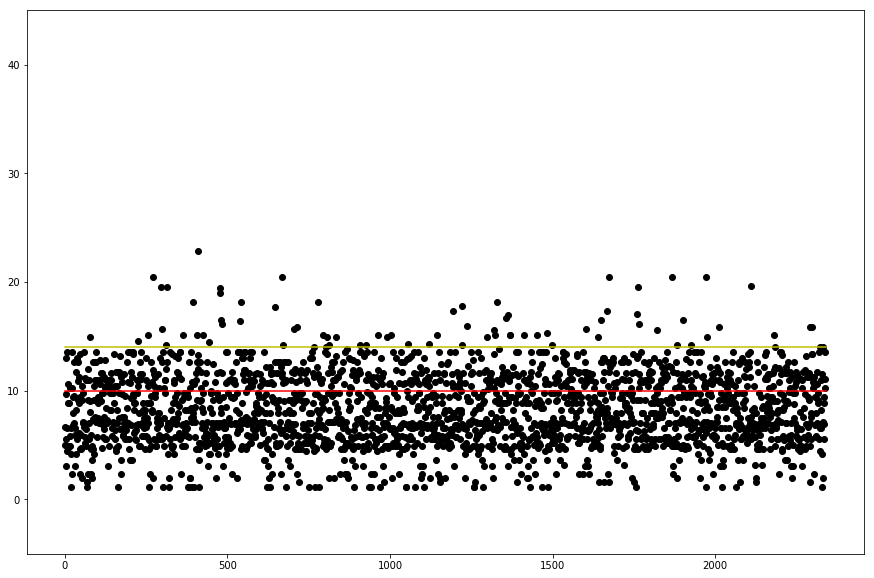

r1: 62, r2: 29, >r2: 3.
../results/dibene-very-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 Only


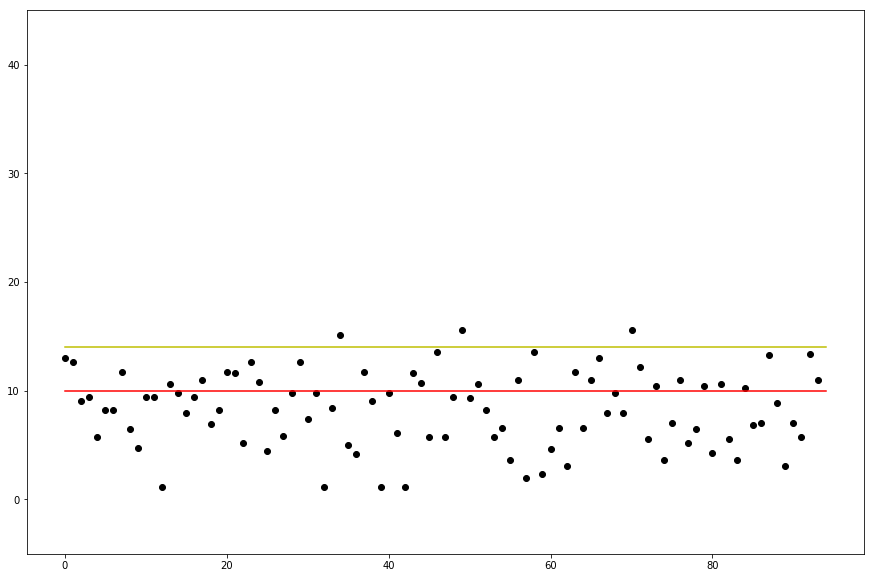

r1: 125, r2: 55, >r2: 6.
../results/dibene-very-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 and 2 


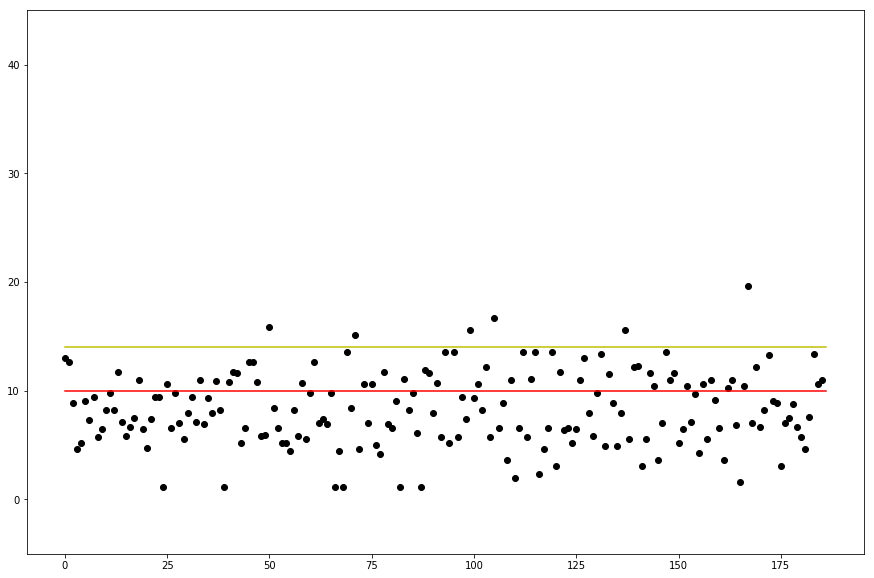

<built-in function min> (10.0, 0.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (501, (62.0, 56.0))
55.45883190883191
47.520584045584044
../results/dibene-very-freq-best-travel-times/Coverages Overlayed


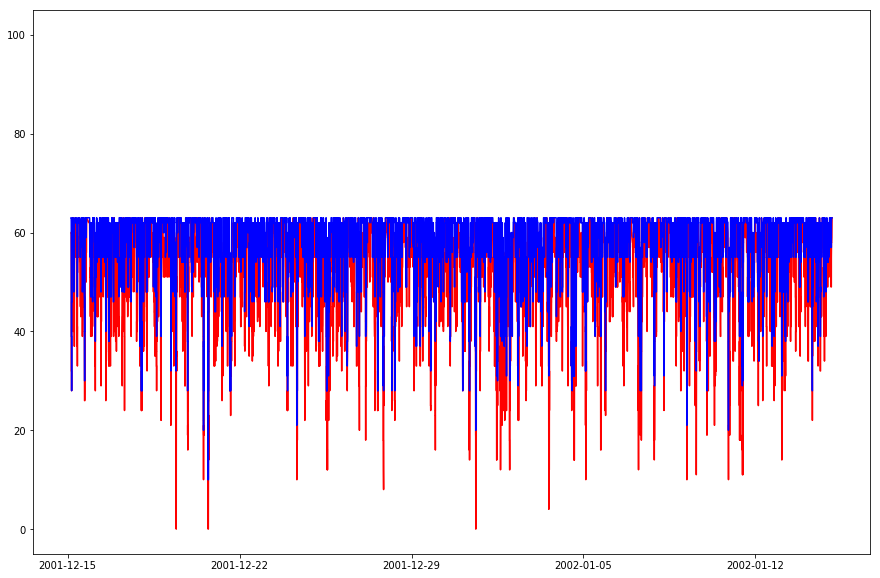

../results/dibene-very-freq-best-travel-times/Total Case Delay in Minutes


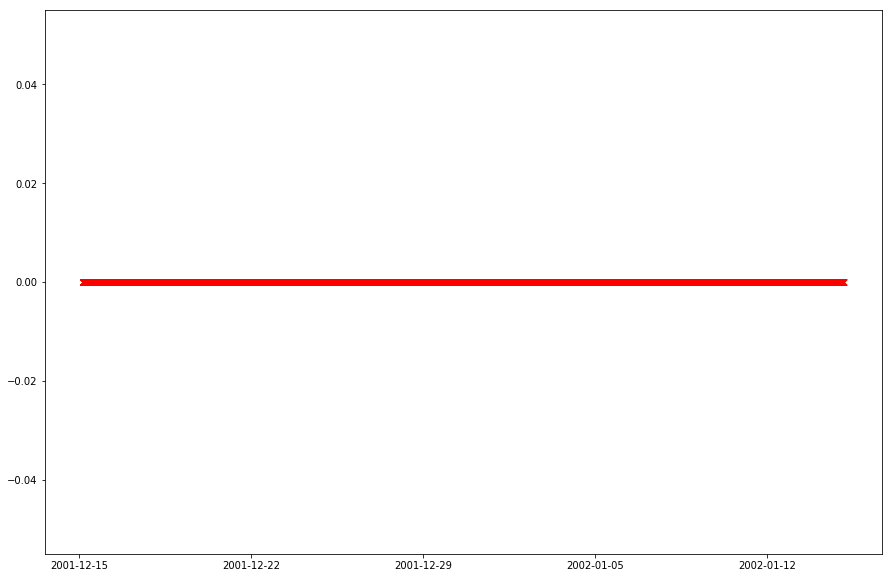

../results/dibene-very-freq-best-travel-times/Total number of cases being delayed


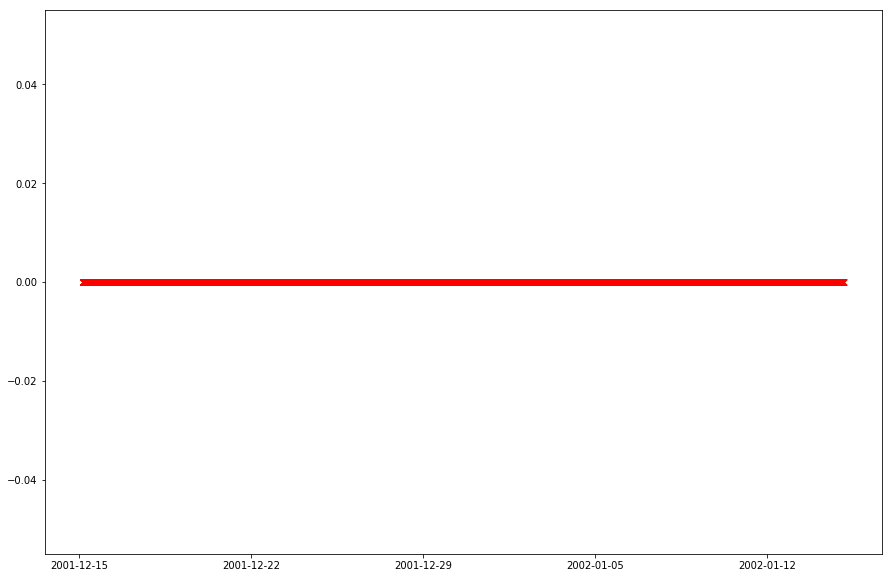

********************************************************************************






********************************************************************************
r1: 352, r2: 450, >r2: 1538.
../results/dibene-very-freq-least-disruption/Time from Base to Emergency in Minutes


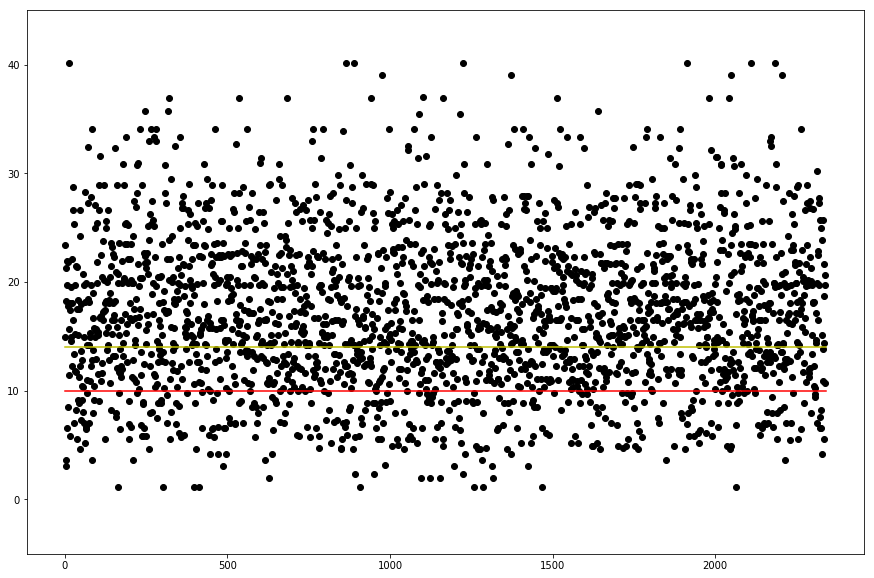

r1: 11, r2: 18, >r2: 65.
../results/dibene-very-freq-least-disruption/Time from Base to Emergency in Minutes - Priority 1 Only


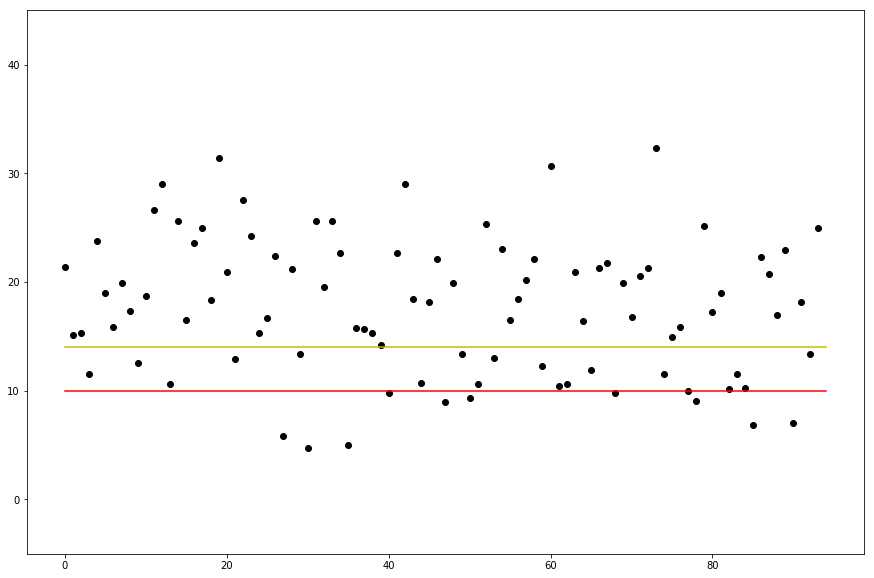

r1: 24, r2: 33, >r2: 129.
../results/dibene-very-freq-least-disruption/Time from Base to Emergency in Minutes - Priority 1 and 2 


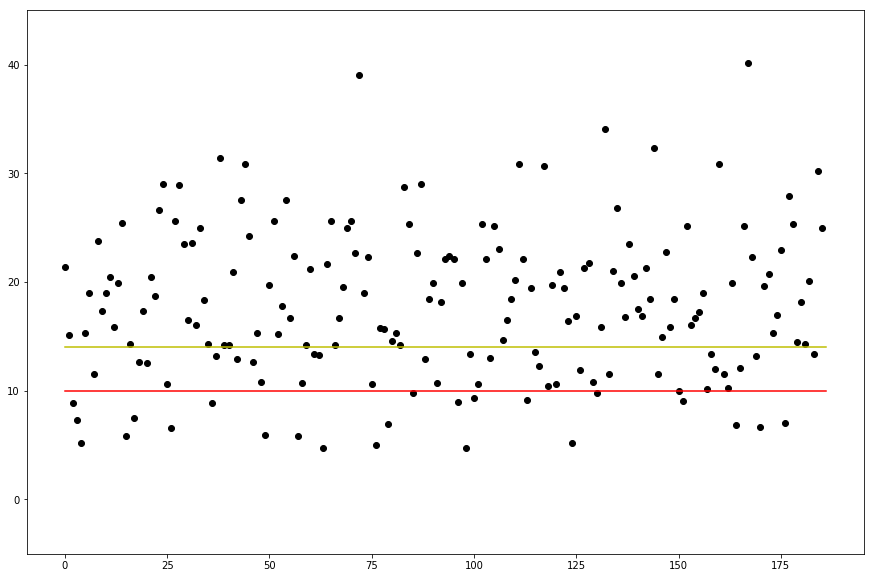

<built-in function min> (0.0, 0.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (1556, (63.0, 50.0))
59.48105413105413
47.95804843304843
../results/dibene-very-freq-least-disruption/Coverages Overlayed


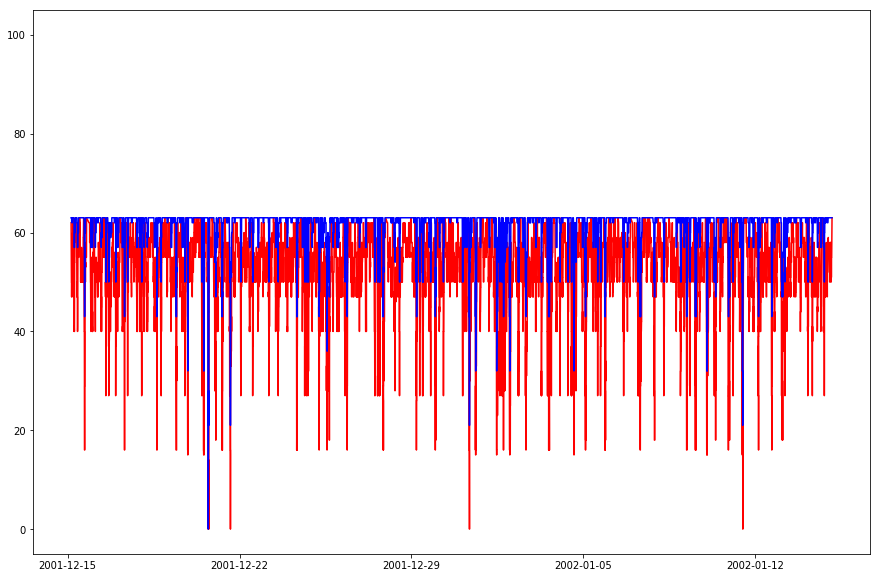

../results/dibene-very-freq-least-disruption/Total Case Delay in Minutes


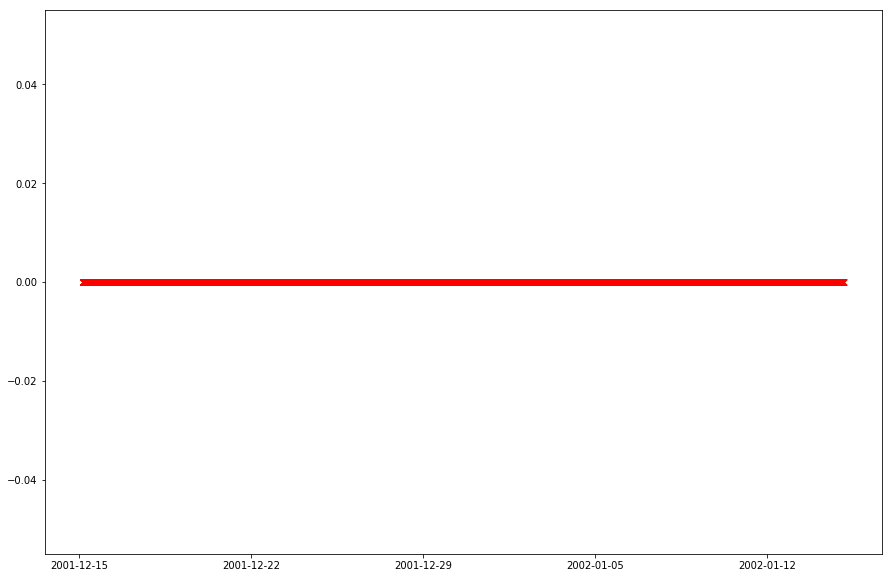

../results/dibene-very-freq-least-disruption/Total number of cases being delayed


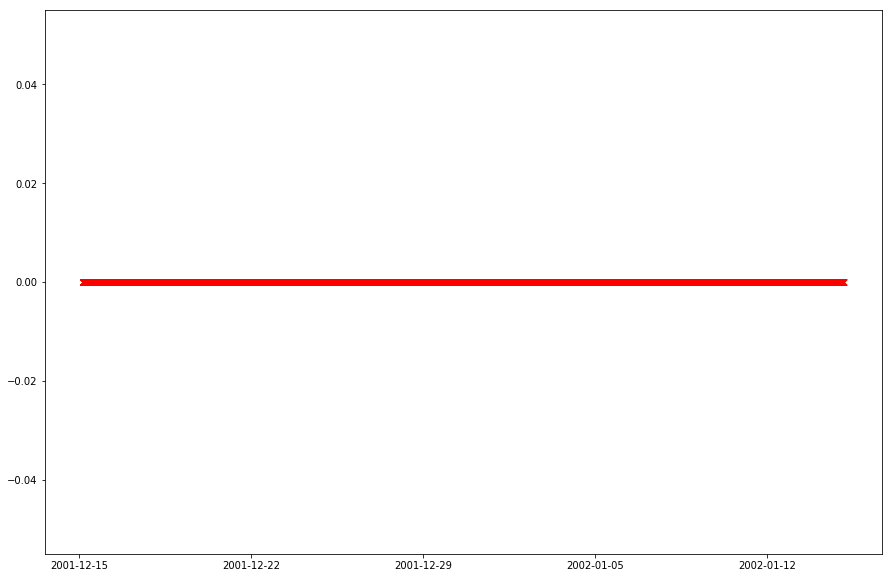

********************************************************************************






********************************************************************************
r1: 1608, r2: 655, >r2: 77.
../results/dibene-very-freq-optimal-dispatch/Time from Base to Emergency in Minutes


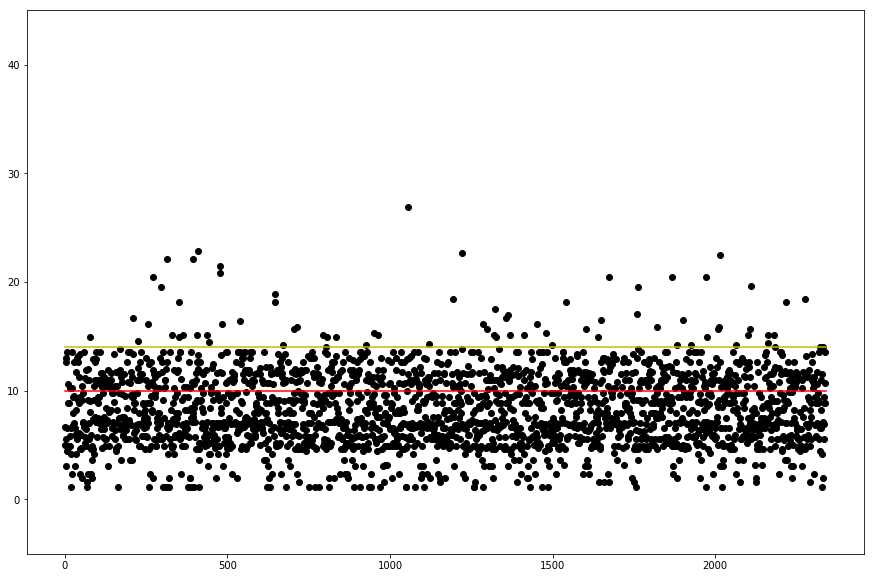

r1: 59, r2: 33, >r2: 2.
../results/dibene-very-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 Only


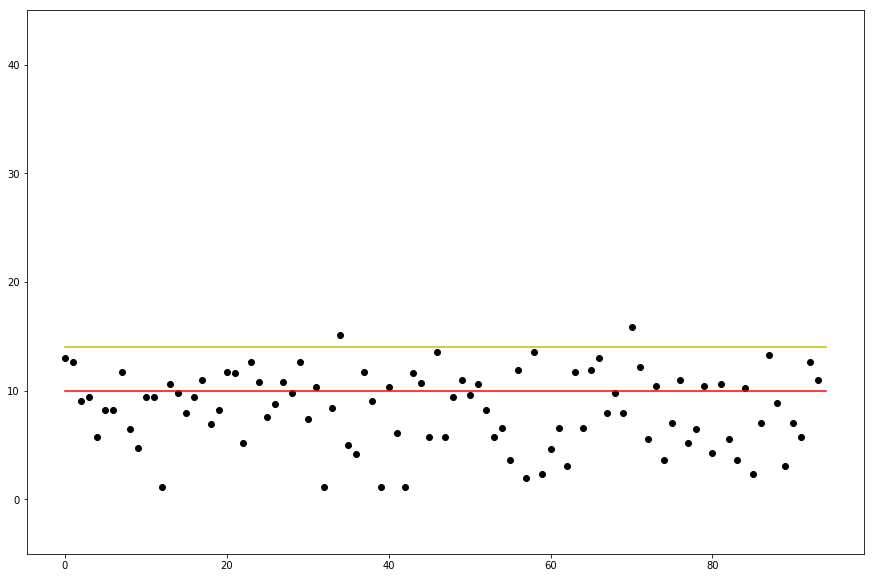

r1: 122, r2: 57, >r2: 7.
../results/dibene-very-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 and 2 


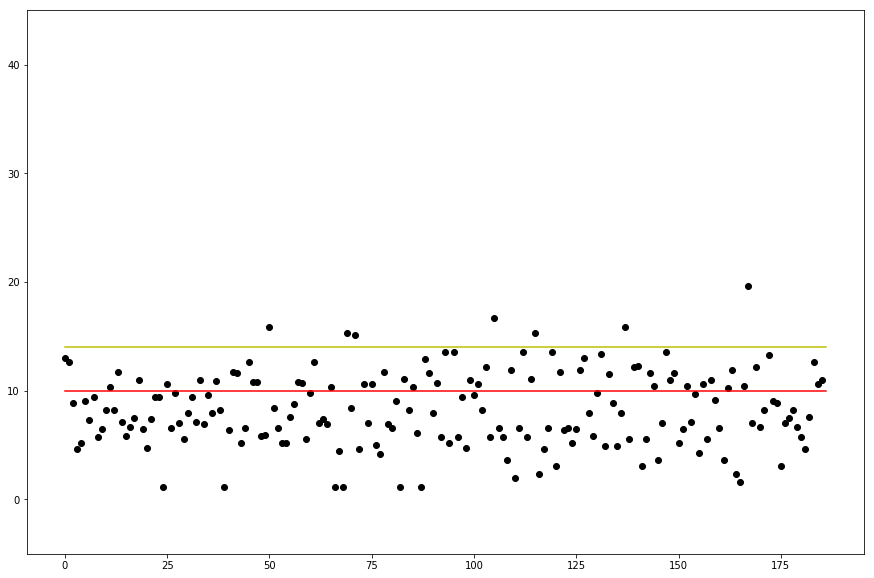

<built-in function min> (10.0, 0.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (463, (62.0, 60.0))
56.05498575498576
47.75021367521367
../results/dibene-very-freq-optimal-dispatch/Coverages Overlayed


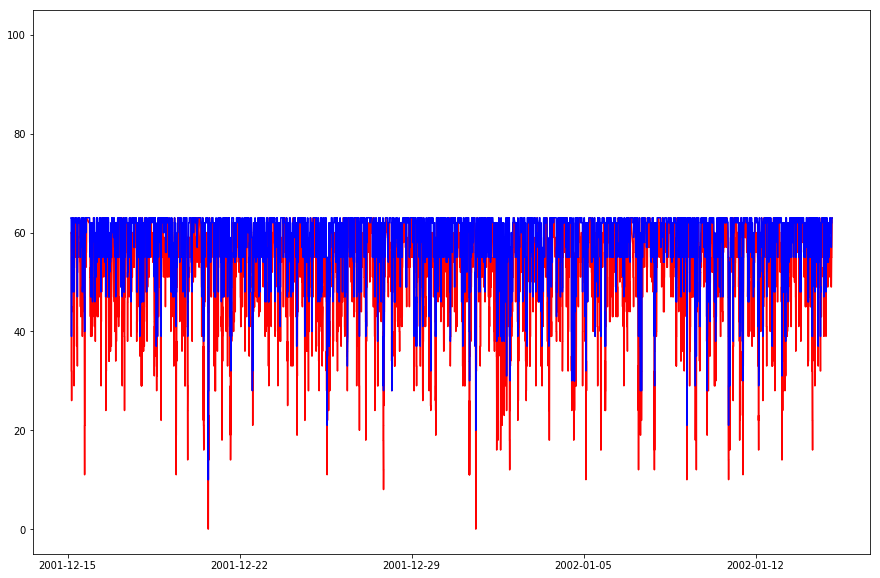

../results/dibene-very-freq-optimal-dispatch/Total Case Delay in Minutes


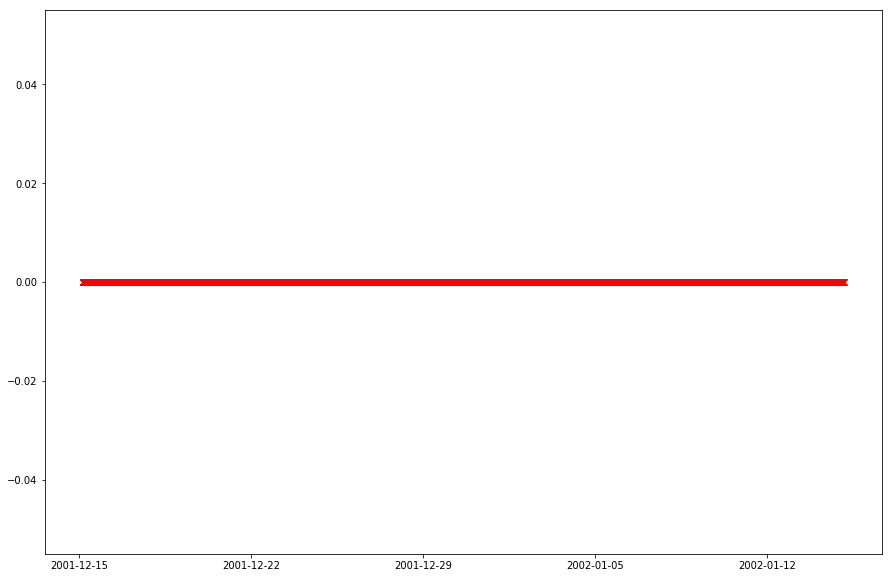

../results/dibene-very-freq-optimal-dispatch/Total number of cases being delayed


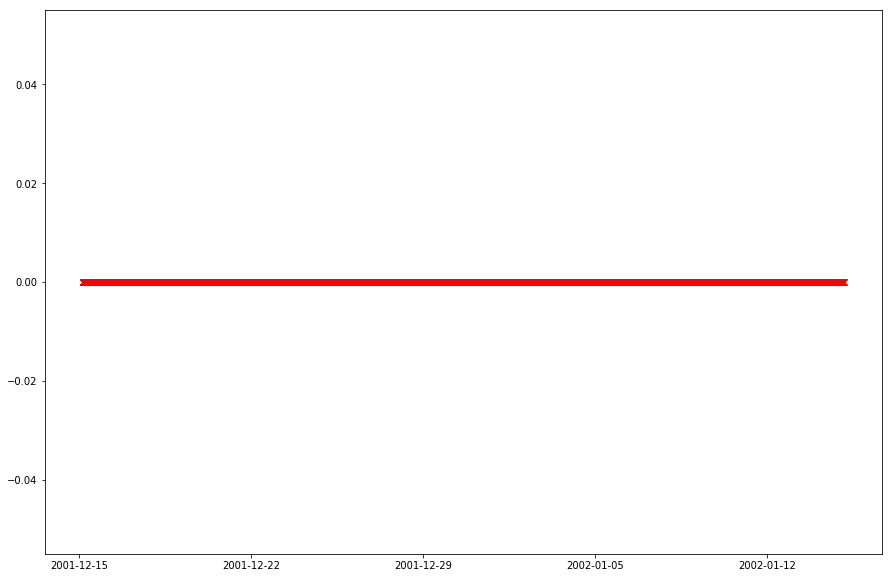

********************************************************************************








In [12]:

scenarios = [
    "dibene-very-freq-best-travel-times",
        "dibene-very-freq-least-disruption",
        "dibene-very-freq-optimal-dispatch",
]

results_path = ["../results/{}/".format(name) for name in scenarios]
figures_path = ["../figures/{} - ".format(name) for name in scenarios]

intensity = 'High'
for i in range(len(scenarios)):
    s = graph(results_path[i], figures_path[i], intensity, dispatch_policy[i] )
    stats.append(s)

********************************************************************************
r1: 2002, r2: 951, >r2: 287.
../results/dibene-xtreme-freq-best-travel-times/Time from Base to Emergency in Minutes


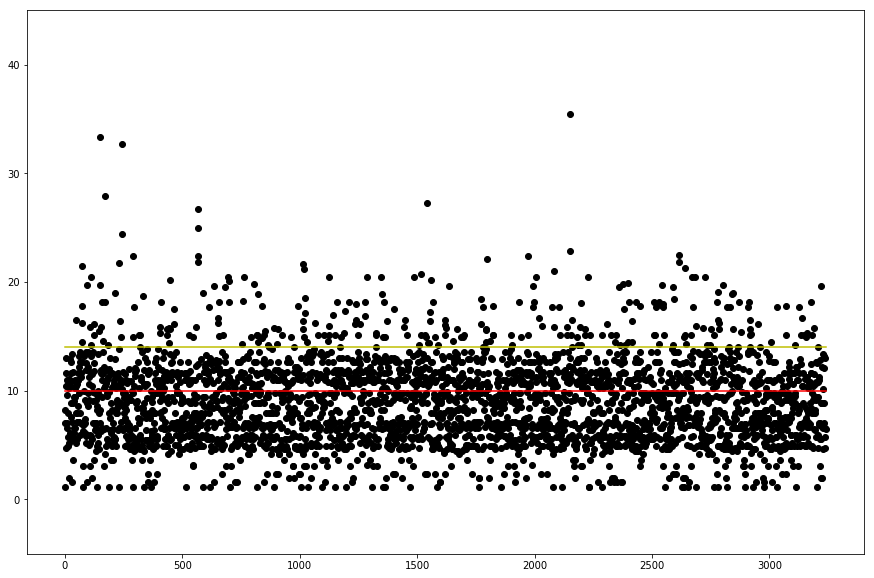

r1: 52, r2: 50, >r2: 13.
../results/dibene-xtreme-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 Only


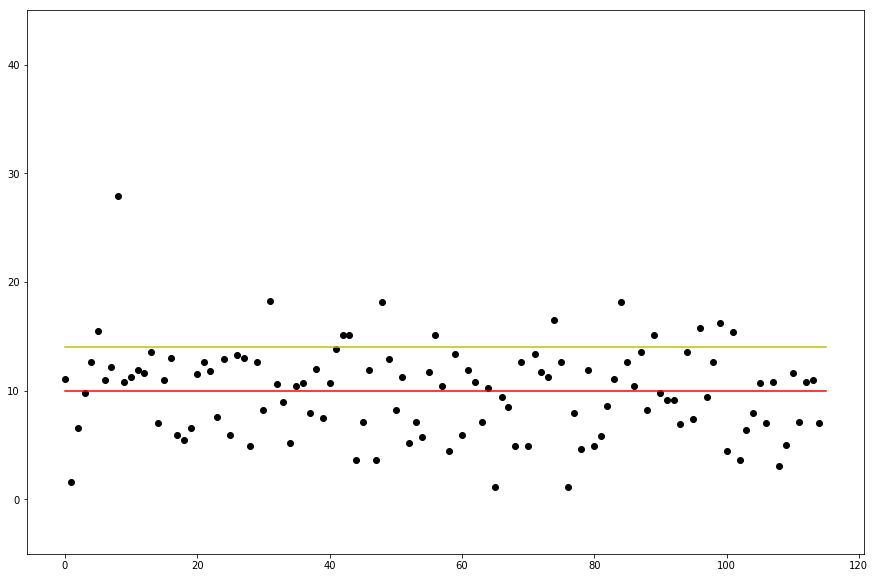

r1: 131, r2: 92, >r2: 20.
../results/dibene-xtreme-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 and 2 


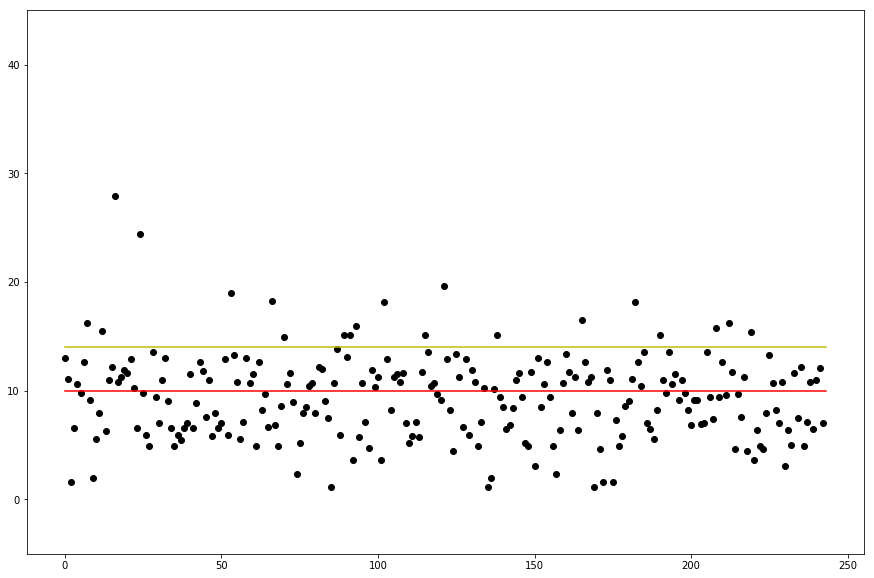

<built-in function min> (0.0, 0.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (467, (62.0, 56.0))
50.34258973567829
40.549933148205284
../results/dibene-xtreme-freq-best-travel-times/Coverages Overlayed


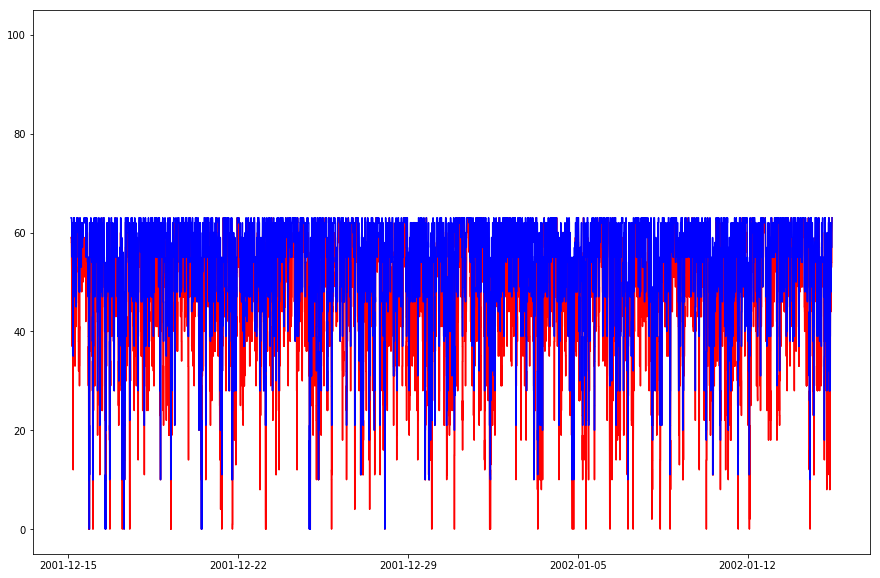

../results/dibene-xtreme-freq-best-travel-times/Total Case Delay in Minutes


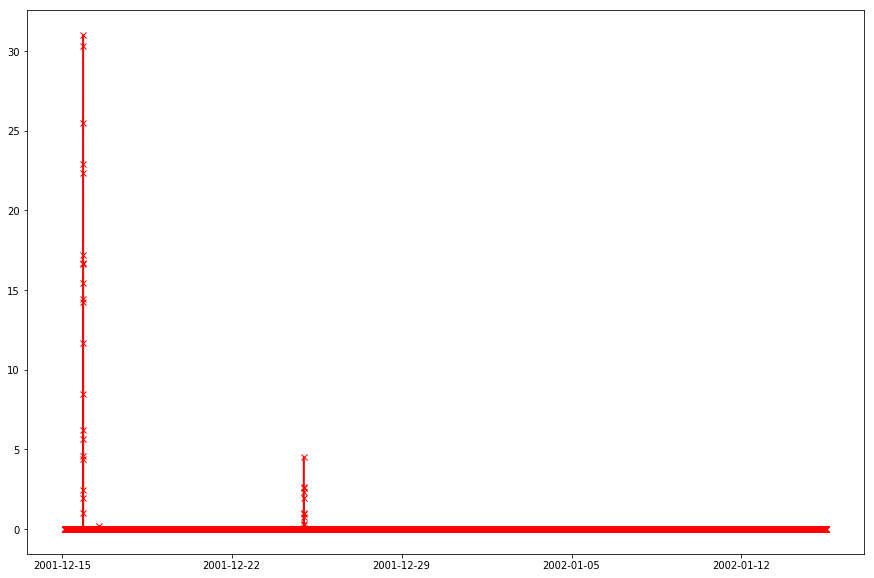

../results/dibene-xtreme-freq-best-travel-times/Total number of cases being delayed


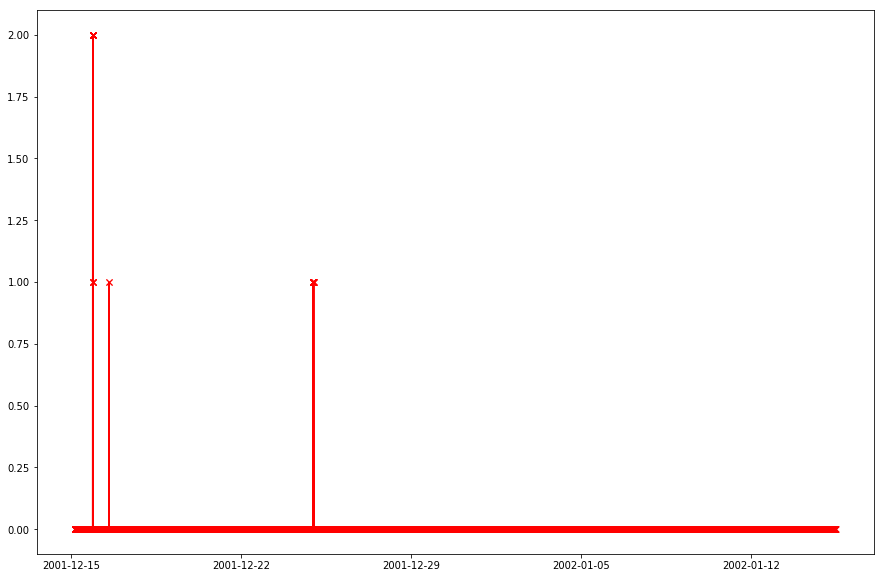

********************************************************************************






********************************************************************************
r1: 510, r2: 622, >r2: 2108.
../results/dibene-xtreme-freq-least-disruption/Time from Base to Emergency in Minutes


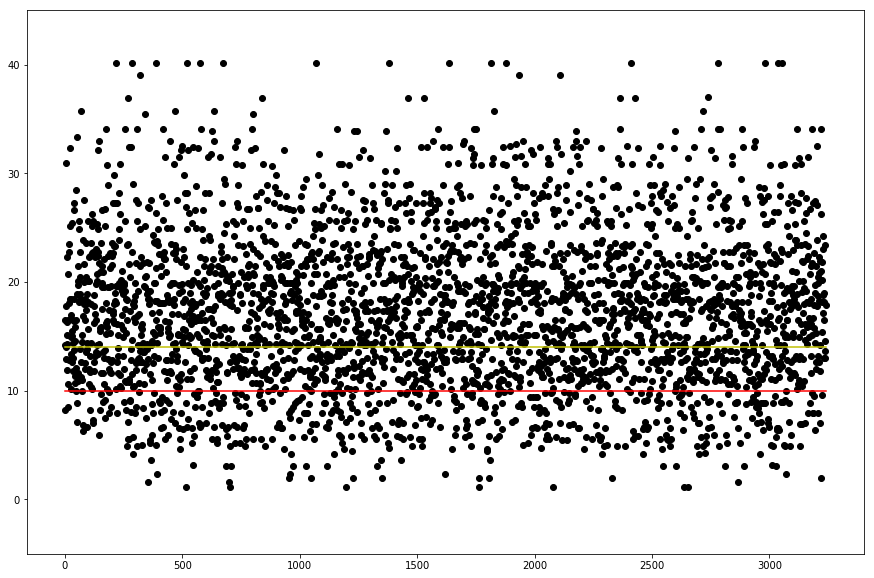

r1: 18, r2: 20, >r2: 77.
../results/dibene-xtreme-freq-least-disruption/Time from Base to Emergency in Minutes - Priority 1 Only


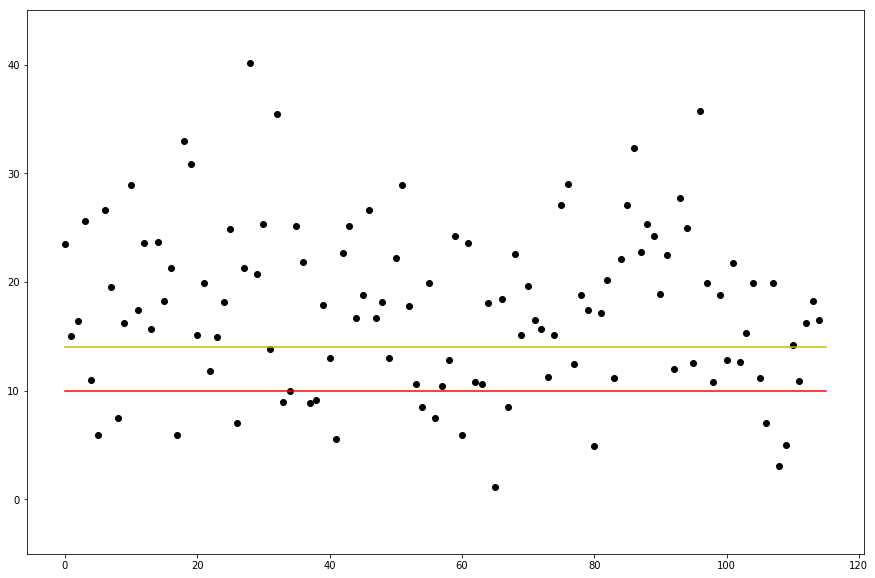

r1: 37, r2: 52, >r2: 154.
../results/dibene-xtreme-freq-least-disruption/Time from Base to Emergency in Minutes - Priority 1 and 2 


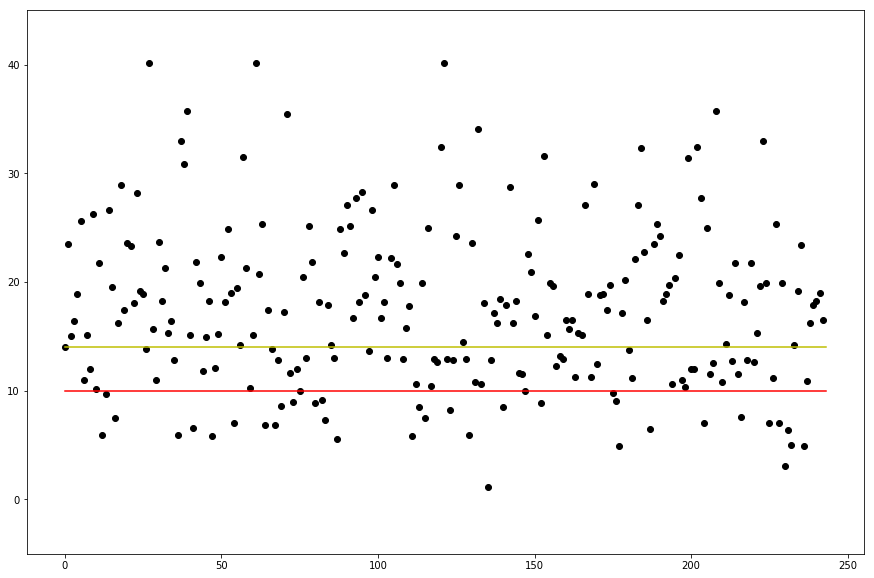

<built-in function min> (0.0, 0.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (1380, (63.0, 50.0))
54.56980627922512
40.403473613894455
../results/dibene-xtreme-freq-least-disruption/Coverages Overlayed


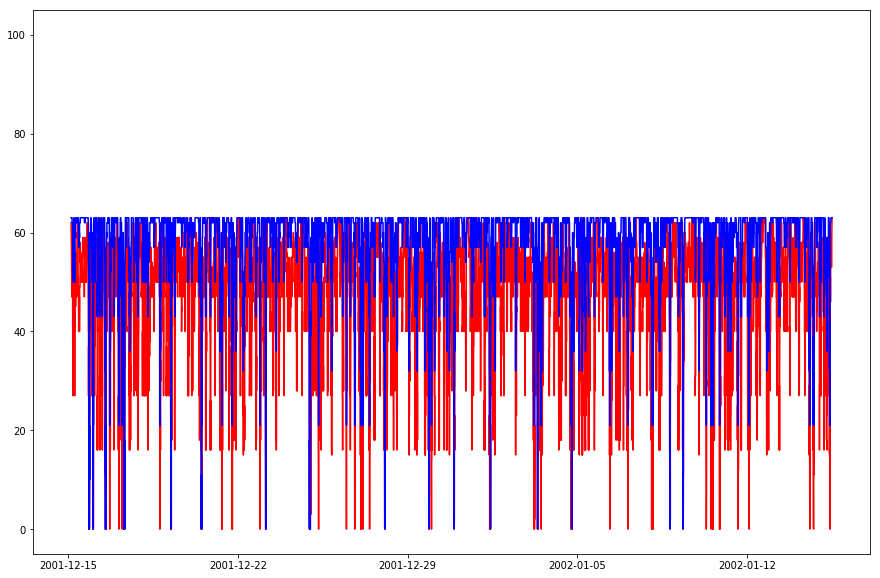

../results/dibene-xtreme-freq-least-disruption/Total Case Delay in Minutes


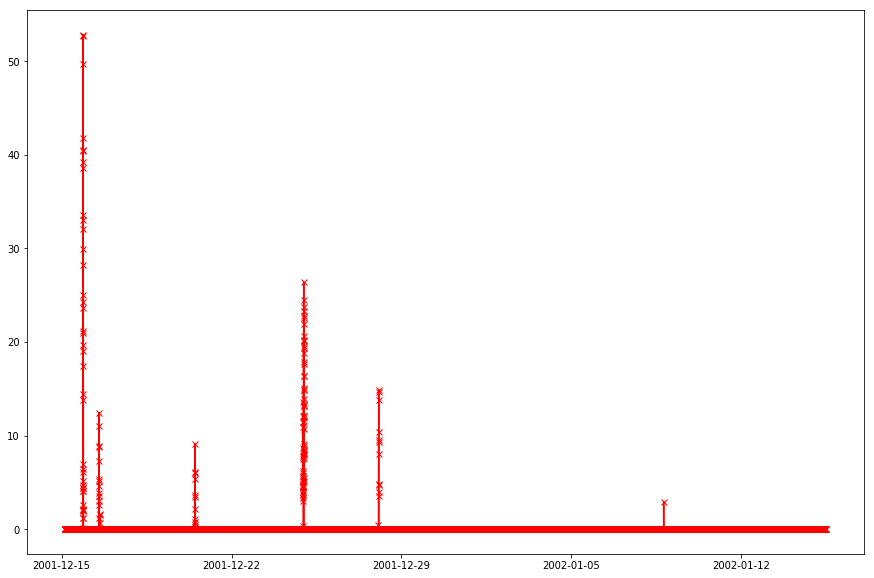

../results/dibene-xtreme-freq-least-disruption/Total number of cases being delayed


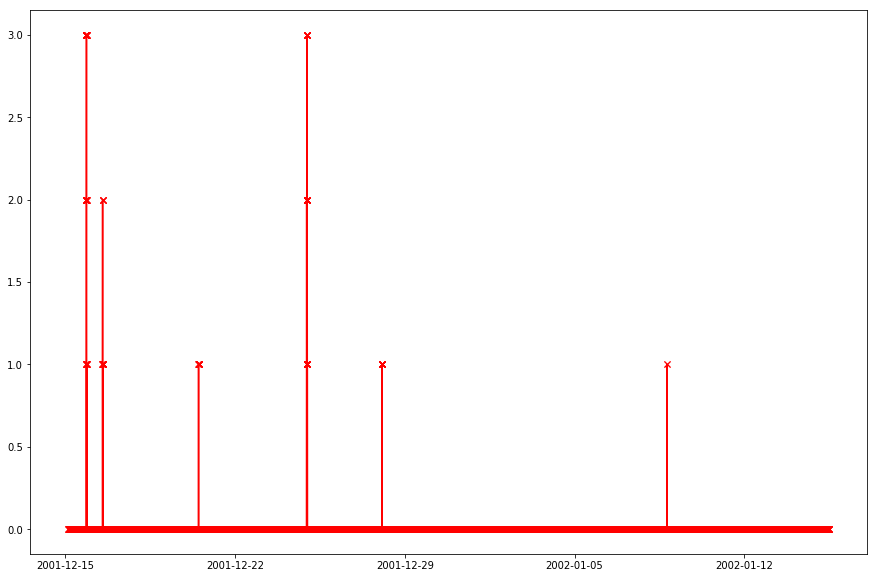

********************************************************************************






********************************************************************************
r1: 1982, r2: 959, >r2: 299.
../results/dibene-xtreme-freq-optimal-dispatch/Time from Base to Emergency in Minutes


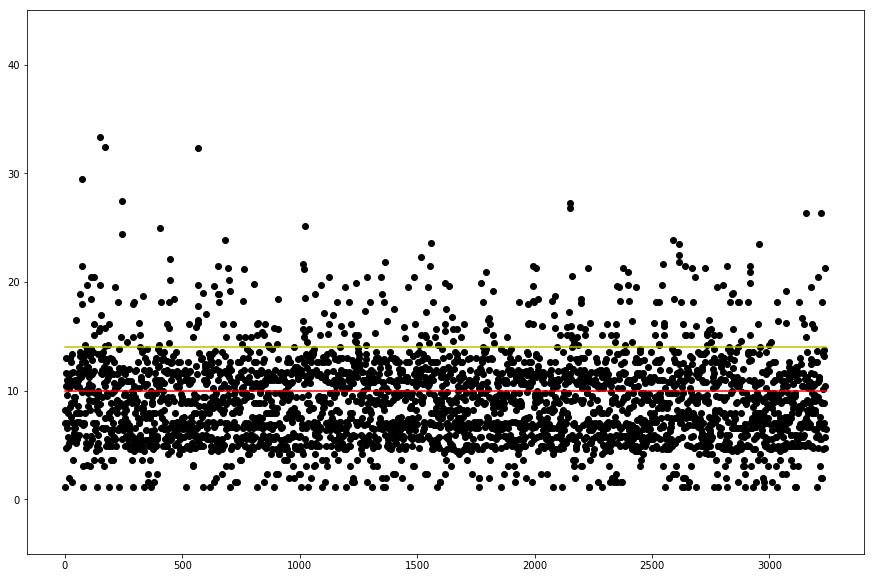

r1: 55, r2: 51, >r2: 9.
../results/dibene-xtreme-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 Only


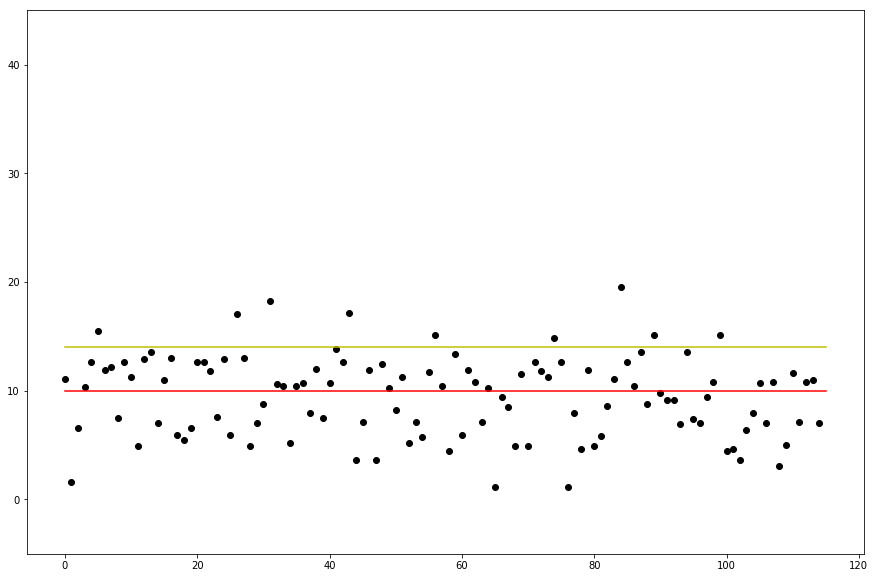

r1: 134, r2: 94, >r2: 15.
../results/dibene-xtreme-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 and 2 


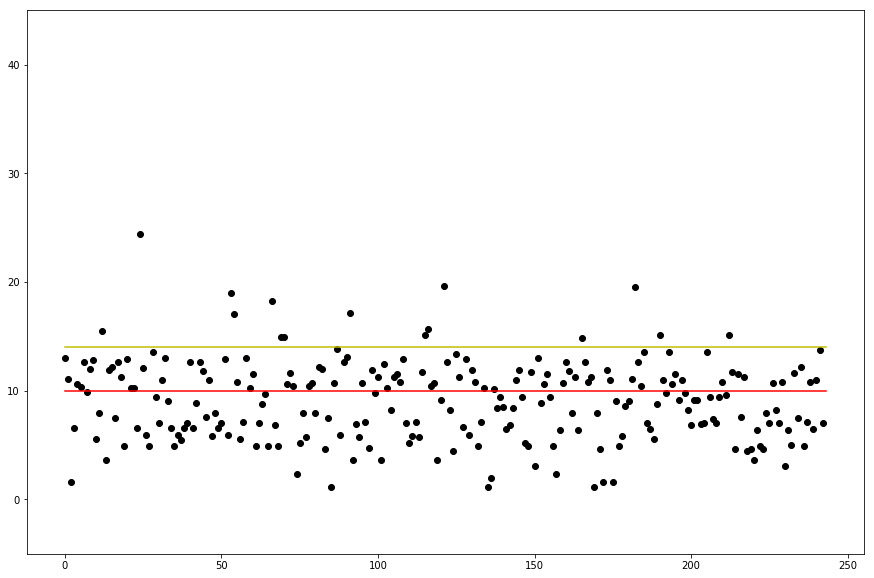

<built-in function min> (0.0, 0.0)
<built-in function max> (63.0, 63.0)
Mode double coverage:  (452, (62.0, 56.0))
51.78695942818944
40.92096467321438
../results/dibene-xtreme-freq-optimal-dispatch/Coverages Overlayed


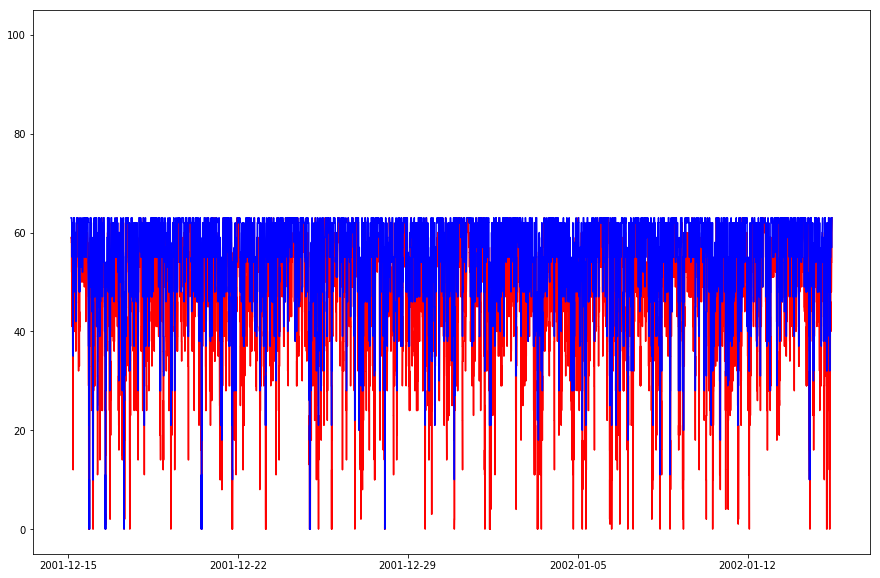

../results/dibene-xtreme-freq-optimal-dispatch/Total Case Delay in Minutes


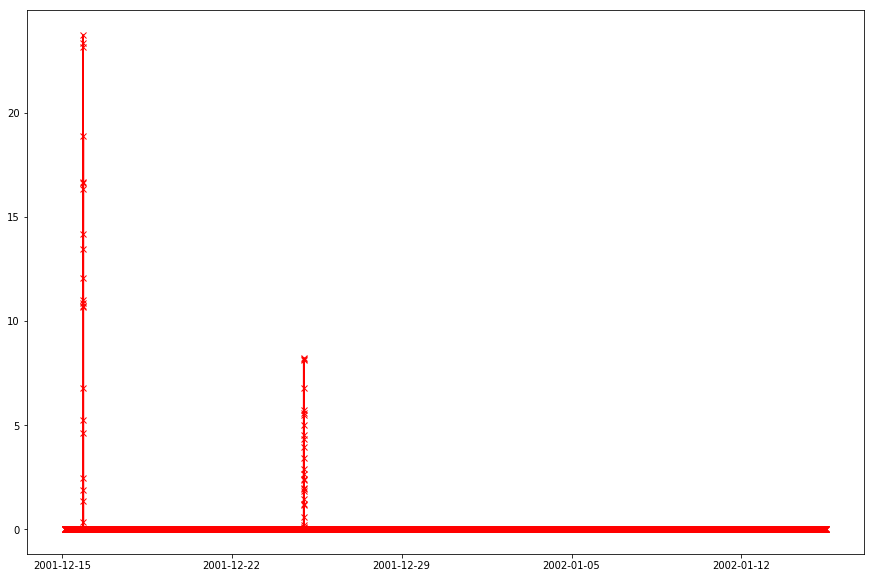

../results/dibene-xtreme-freq-optimal-dispatch/Total number of cases being delayed


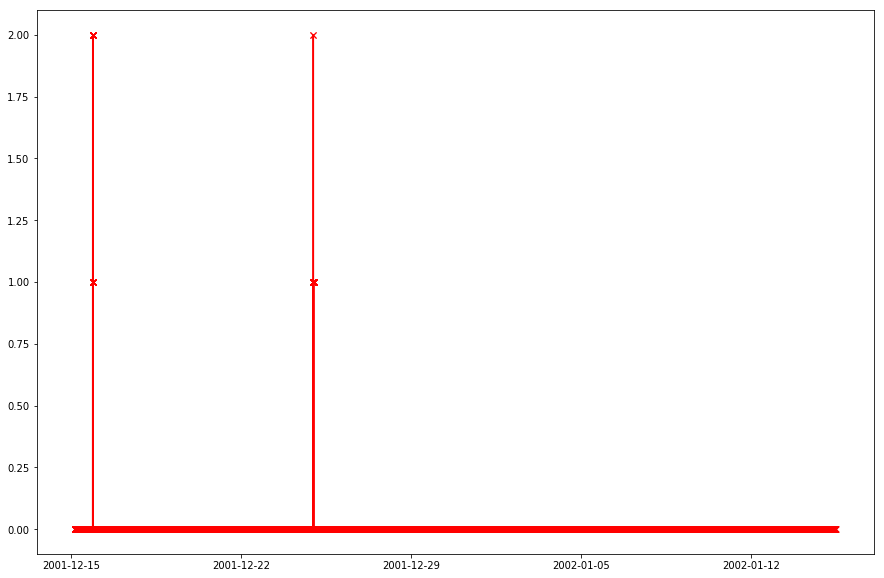

********************************************************************************








In [13]:

scenarios = [
    "dibene-xtreme-freq-best-travel-times",
    "dibene-xtreme-freq-least-disruption",
    "dibene-xtreme-freq-optimal-dispatch",
]

results_path = ["../results/{}/".format(name) for name in scenarios]
figures_path = ["../figures/{} - ".format(name) for name in scenarios]

intensity = 'Highest'
for i in range(len(scenarios)):
    s = graph(results_path[i], figures_path[i], intensity, dispatch_policy[i] )
    stats.append(s)

In [14]:
stats

[[{'r1': 145,
   'r2': 64,
   'beyond': 1,
   'intensity': 'Low',
   'dispatch_policy': 'Best Travel Time'},
  {'r1': 7,
   'r2': 3,
   'beyond': 0,
   'intensity': 'Low',
   'dispatch_policy': 'Best Travel Time'},
  {'r1': 15,
   'r2': 8,
   'beyond': 0,
   'intensity': 'Low',
   'dispatch_policy': 'Best Travel Time'},
  {'min': (49.0, 49.0),
   'max': (63.0, 63.0),
   'mode': (369, (62.0, 60.0)),
   'mean_p': 61.964285714285715,
   'mean_s': 59.34761904761905,
   'intensity': 'Low',
   'dispatch_policy': 'Best Travel Time'},
  {'totaltime': 0.0,
   'totalnum': 0,
   'maxtime': 0.0,
   'maxnum': 0,
   'intensity': 'Low',
   'dispatch_policy': 'Best Travel Time'}],
 [{'r1': 31,
   'r2': 54,
   'beyond': 125,
   'intensity': 'Low',
   'dispatch_policy': 'Least Coverage Disruption'},
  {'r1': 1,
   'r2': 1,
   'beyond': 8,
   'intensity': 'Low',
   'dispatch_policy': 'Least Coverage Disruption'},
  {'r1': 2,
   'r2': 4,
   'beyond': 17,
   'intensity': 'Low',
   'dispatch_policy': 'Least

In [15]:
len(stats)


15

In [16]:
for s in stats:
    print(len(s))

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [17]:
# Generate the Travel Times Table 
# All priorities only.


for s in stats:
    for i in range(1):
        total = sum([s[i]['r1'], s[i]['r2'], s[i]['beyond']  ])
        line = "{} & {} & {} & {} & {} & {} \\\\ \hline".format(s[i]['intensity'], s[i]['dispatch_policy'], 
                                                                     total, s[i]['r1'], s[i]['r2'], s[i]['beyond'])
        print(line)

        

Low & Best Travel Time & 210 & 145 & 64 & 1 \\ \hline
Low & Least Coverage Disruption & 210 & 31 & 54 & 125 \\ \hline
Low & Optimal Dispatch & 210 & 144 & 65 & 1 \\ \hline
Medium Low & Best Travel Time & 690 & 502 & 187 & 1 \\ \hline
Medium Low & Least Coverage Disruption & 690 & 96 & 146 & 448 \\ \hline
Medium Low & Optimal Dispatch & 690 & 495 & 194 & 1 \\ \hline
Medium & Best Travel Time & 1410 & 998 & 379 & 33 \\ \hline
Medium & Least Coverage Disruption & 1410 & 231 & 251 & 928 \\ \hline
Medium & Optimal Dispatch & 1410 & 979 & 398 & 33 \\ \hline
High & Best Travel Time & 2340 & 1621 & 640 & 79 \\ \hline
High & Least Coverage Disruption & 2340 & 352 & 450 & 1538 \\ \hline
High & Optimal Dispatch & 2340 & 1608 & 655 & 77 \\ \hline
Highest & Best Travel Time & 3240 & 2002 & 951 & 287 \\ \hline
Highest & Least Coverage Disruption & 3240 & 510 & 622 & 2108 \\ \hline
Highest & Optimal Dispatch & 3240 & 1982 & 959 & 299 \\ \hline


In [18]:
# Generate the Travel Times Table 
# Priority 1 only


for s in stats:
    for i in range(1,2):
        total = sum([s[i]['r1'], s[i]['r2'], s[i]['beyond']  ])
        line = "{} & {} & {} & {} & {} & {} \\\\ \hline".format(s[i]['intensity'], s[i]['dispatch_policy'], 
                                                                     total, s[i]['r1'], s[i]['r2'], s[i]['beyond'])
        print(line)

        

Low & Best Travel Time & 10 & 7 & 3 & 0 \\ \hline
Low & Least Coverage Disruption & 10 & 1 & 1 & 8 \\ \hline
Low & Optimal Dispatch & 10 & 7 & 3 & 0 \\ \hline
Medium Low & Best Travel Time & 13 & 10 & 3 & 0 \\ \hline
Medium Low & Least Coverage Disruption & 13 & 3 & 0 & 10 \\ \hline
Medium Low & Optimal Dispatch & 13 & 10 & 3 & 0 \\ \hline
Medium & Best Travel Time & 50 & 35 & 13 & 2 \\ \hline
Medium & Least Coverage Disruption & 50 & 11 & 14 & 25 \\ \hline
Medium & Optimal Dispatch & 50 & 35 & 13 & 2 \\ \hline
High & Best Travel Time & 94 & 62 & 29 & 3 \\ \hline
High & Least Coverage Disruption & 94 & 11 & 18 & 65 \\ \hline
High & Optimal Dispatch & 94 & 59 & 33 & 2 \\ \hline
Highest & Best Travel Time & 115 & 52 & 50 & 13 \\ \hline
Highest & Least Coverage Disruption & 115 & 18 & 20 & 77 \\ \hline
Highest & Optimal Dispatch & 115 & 55 & 51 & 9 \\ \hline


In [19]:
# Generate the Travel Times Table 
# Priority 1 and 2 


for s in stats:
    for i in range(2, 3):
        total = sum([s[i]['r1'], s[i]['r2'], s[i]['beyond']  ])
        toline = "{} & {} & {} & {} & {} & {} \\\\ \hline".format(s[i]['intensity'], s[i]['dispatch_policy'], 
                                                                     total, s[i]['r1'], s[i]['r2'], s[i]['beyond'])
        print(toline)

        

Low & Best Travel Time & 23 & 15 & 8 & 0 \\ \hline
Low & Least Coverage Disruption & 23 & 2 & 4 & 17 \\ \hline
Low & Optimal Dispatch & 23 & 15 & 8 & 0 \\ \hline
Medium Low & Best Travel Time & 26 & 19 & 7 & 0 \\ \hline
Medium Low & Least Coverage Disruption & 26 & 5 & 3 & 18 \\ \hline
Medium Low & Optimal Dispatch & 26 & 19 & 7 & 0 \\ \hline
Medium & Best Travel Time & 106 & 76 & 27 & 3 \\ \hline
Medium & Least Coverage Disruption & 106 & 20 & 23 & 63 \\ \hline
Medium & Optimal Dispatch & 106 & 75 & 28 & 3 \\ \hline
High & Best Travel Time & 186 & 125 & 55 & 6 \\ \hline
High & Least Coverage Disruption & 186 & 24 & 33 & 129 \\ \hline
High & Optimal Dispatch & 186 & 122 & 57 & 7 \\ \hline
Highest & Best Travel Time & 243 & 131 & 92 & 20 \\ \hline
Highest & Least Coverage Disruption & 243 & 37 & 52 & 154 \\ \hline
Highest & Optimal Dispatch & 243 & 134 & 94 & 15 \\ \hline


In [20]:
# Print out the coverages

for s in stats: 
    d = s[3]
    l = "{} & {} & {} & {} & {} & {} & {} \\\\ \hline".format(d['intensity'], d['dispatch_policy'], d['min'], d['max'],
                                                 d['mode'],round(d['mean_p'], 3), round(d['mean_s'],3))
    print(l)

Low & Best Travel Time & (49.0, 49.0) & (63.0, 63.0) & (369, (62.0, 60.0)) & 61.964 & 59.348 \\ \hline
Low & Least Coverage Disruption & (63.0, 55.0) & (63.0, 63.0) & (656, (63.0, 62.0)) & 63.0 & 60.643 \\ \hline
Low & Optimal Dispatch & (49.0, 49.0) & (63.0, 63.0) & (346, (62.0, 60.0)) & 62.244 & 59.471 \\ \hline
Medium Low & Best Travel Time & (45.0, 45.0) & (63.0, 63.0) & (830, (62.0, 60.0)) & 61.146 & 57.338 \\ \hline
Medium Low & Least Coverage Disruption & (62.0, 47.0) & (63.0, 63.0) & (1181, (63.0, 62.0)) & 62.99 & 58.563 \\ \hline
Medium Low & Optimal Dispatch & (45.0, 45.0) & (63.0, 63.0) & (764, (62.0, 60.0)) & 61.464 & 57.489 \\ \hline
Medium & Best Travel Time & (29.0, 12.0) & (63.0, 63.0) & (636, (62.0, 60.0)) & 58.885 & 52.962 \\ \hline
Medium & Least Coverage Disruption & (21.0, 0.0) & (63.0, 63.0) & (1438, (63.0, 55.0)) & 62.164 & 54.102 \\ \hline
Medium & Optimal Dispatch & (21.0, 0.0) & (63.0, 63.0) & (599, (62.0, 60.0)) & 59.329 & 53.215 \\ \hline
High & Best Travel 

In [21]:
# Print out the delays
for s in stats:
    d = s[4]
    l = '{} & {} & {} & {} & {} & {} \\\\ \hline'.format(
        d['intensity'],
        d['dispatch_policy'],
        d['maxtime'],
        d['totaltime'],
        d['maxnum'],
        d['totalnum']
    )
    print(l)

Low & Best Travel Time & 0.0 & 0.0 & 0 & 0 \\ \hline
Low & Least Coverage Disruption & 0.0 & 0.0 & 0 & 0 \\ \hline
Low & Optimal Dispatch & 0.0 & 0.0 & 0 & 0 \\ \hline
Medium Low & Best Travel Time & 0.0 & 0.0 & 0 & 0 \\ \hline
Medium Low & Least Coverage Disruption & 0.0 & 0.0 & 0 & 0 \\ \hline
Medium Low & Optimal Dispatch & 0.0 & 0.0 & 0 & 0 \\ \hline
Medium & Best Travel Time & 0.0 & 0.0 & 0 & 0 \\ \hline
Medium & Least Coverage Disruption & 0.0 & 0.0 & 0 & 0 \\ \hline
Medium & Optimal Dispatch & 0.0 & 0.0 & 0 & 0 \\ \hline
High & Best Travel Time & 0.0 & 0.0 & 0 & 0 \\ \hline
High & Least Coverage Disruption & 0.0 & 0.0 & 0 & 0 \\ \hline
High & Optimal Dispatch & 0.0 & 0.0 & 0 & 0 \\ \hline
Highest & Best Travel Time & 31.01 & 290.751 & 2 & 53 \\ \hline
Highest & Least Coverage Disruption & 52.803 & 1735.67 & 3 & 268 \\ \hline
Highest & Optimal Dispatch & 23.743 & 334.436 & 2 & 65 \\ \hline
